In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


In [40]:
# קריאת הקובץ
df = pd.read_csv("merged_booking_final.csv")

# המרת checkin לעמודת תאריך
df["checkin"] = pd.to_datetime(df["checkin"])

# הגדרת תאריך הצילום (snapshot) כערך המינימלי בעמודת checkin
snapshot_date = df["checkin"].min()

# חישוב TTT: ההפרש בין checkin לבין ה-snapshot בימים
df["ttt"] = (df["checkin"] - snapshot_date).dt.days

# שמירת הקובץ המעודכן
df.to_csv("merged_booking_final.csv", index=False)

# הצגת הדגימה לאחר החישוב
df.head()

,hotel_name,star_rating,rating_score,location_score,review_amount,price,breakfast_included,free_cancellation,no_prepayment_needed,centrally_located,sustainability_certification,checkin,checkout,snapshot,group_index,bed_score,distance_score,hotel_name_encoded,ttt,los
0,Roxy Hotel New York,4.0,8.6,9.3,1145.0,398,0,0,0,1,0,2025-03-10,2025-03-11,2025-03-10,1,4.0,5,280,0,1
1,Riu Plaza Manhattan Times Square,4.0,8.7,9.6,13232.0,275,0,0,1,1,1,2025-03-10,2025-03-11,2025-03-10,2,4.0,5,276,0,1
2,UNTITLED at 3 Freeman Alley,4.0,8.5,NaN,592.0,243,0,0,0,1,0,2025-03-10,2025-03-11,2025-03-10,3,3.0,5,390,0,1
3,Aura Hotel Times Square Newly Renovated,4.0,7.7,9.4,507.0,259,0,0,0,1,0,2025-03-10,2025-03-11,2025-03-10,4,2.0,5,27,0,1
4,Sonder at One Platt,4.0,8.2,NaN,1908.0,220,0,0,0,1,0,2025-03-10,2025-03-11,2025-03-10,5,0.0,5,302,0,1


In [41]:
# קריאת הקובץ
df = pd.read_csv("merged_booking_final.csv")

# המרת checkin ו-checkout לעמודות תאריך
df["checkin"] = pd.to_datetime(df["checkin"])
df["checkout"] = pd.to_datetime(df["checkout"])

# חישוב LOS: ההפרש בין checkout לבין checkin בימים
df["los"] = (df["checkout"] - df["checkin"]).dt.days

# שמירת הקובץ המעודכן
df.to_csv("merged_booking_final.csv", index=False)

# הצגת הדגימה לאחר החישוב
df.head()

,hotel_name,star_rating,rating_score,location_score,review_amount,price,breakfast_included,free_cancellation,no_prepayment_needed,centrally_located,sustainability_certification,checkin,checkout,snapshot,group_index,bed_score,distance_score,hotel_name_encoded,ttt,los
0,Roxy Hotel New York,4.0,8.6,9.3,1145.0,398,0,0,0,1,0,2025-03-10,2025-03-11,2025-03-10,1,4.0,5,280,0,1
1,Riu Plaza Manhattan Times Square,4.0,8.7,9.6,13232.0,275,0,0,1,1,1,2025-03-10,2025-03-11,2025-03-10,2,4.0,5,276,0,1
2,UNTITLED at 3 Freeman Alley,4.0,8.5,NaN,592.0,243,0,0,0,1,0,2025-03-10,2025-03-11,2025-03-10,3,3.0,5,390,0,1
3,Aura Hotel Times Square Newly Renovated,4.0,7.7,9.4,507.0,259,0,0,0,1,0,2025-03-10,2025-03-11,2025-03-10,4,2.0,5,27,0,1
4,Sonder at One Platt,4.0,8.2,NaN,1908.0,220,0,0,0,1,0,2025-03-10,2025-03-11,2025-03-10,5,0.0,5,302,0,1


In [42]:
# קריאת הקובץ merged_booking_final.csv
df = pd.read_csv("merged_booking_final.csv")

# הצצה ראשונית
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45400 entries, 0 to 45399
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   hotel_name                    45385 non-null  object 
 1   star_rating                   45011 non-null  float64
 2   rating_score                  45374 non-null  float64
 3   location_score                26850 non-null  float64
 4   review_amount                 45346 non-null  float64
 5   price                         45400 non-null  int64  
 6   breakfast_included            45400 non-null  int64  
 7   free_cancellation             45400 non-null  int64  
 8   no_prepayment_needed          45400 non-null  int64  
 9   centrally_located             45400 non-null  int64  
 10  sustainability_certification  45400 non-null  int64  
 11  checkin                       45400 non-null  object 
 12  checkout                      45400 non-null  object 
 13  s

In [43]:
#נסתכל כמה NaN יש ב-star_rating
print("Missing in star_rating:", df["star_rating"].isna().sum())

Missing in star_rating: 389


In [44]:
df.head()

,hotel_name,star_rating,rating_score,location_score,review_amount,price,breakfast_included,free_cancellation,no_prepayment_needed,centrally_located,sustainability_certification,checkin,checkout,snapshot,group_index,bed_score,distance_score,hotel_name_encoded,ttt,los
0,Roxy Hotel New York,4.0,8.6,9.3,1145.0,398,0,0,0,1,0,2025-03-10,2025-03-11,2025-03-10,1,4.0,5,280,0,1
1,Riu Plaza Manhattan Times Square,4.0,8.7,9.6,13232.0,275,0,0,1,1,1,2025-03-10,2025-03-11,2025-03-10,2,4.0,5,276,0,1
2,UNTITLED at 3 Freeman Alley,4.0,8.5,NaN,592.0,243,0,0,0,1,0,2025-03-10,2025-03-11,2025-03-10,3,3.0,5,390,0,1
3,Aura Hotel Times Square Newly Renovated,4.0,7.7,9.4,507.0,259,0,0,0,1,0,2025-03-10,2025-03-11,2025-03-10,4,2.0,5,27,0,1
4,Sonder at One Platt,4.0,8.2,NaN,1908.0,220,0,0,0,1,0,2025-03-10,2025-03-11,2025-03-10,5,0.0,5,302,0,1


In [45]:
# Feature Engineering

# Extract day of week from check-in date
df['day_of_week'] = pd.to_datetime(df['checkin']).dt.dayofweek

# Create a feature for weekend check-ins
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Distance from end of month
df['days_to_month_end'] = pd.to_datetime(df['checkin']).dt.days_in_month - pd.to_datetime(df['checkin']).dt.day

# Short notice booking flag
df['short_notice'] = (df['ttt'] < 14).astype(int)


# Extract month and year for seasonality
df['check_in_month'] = pd.to_datetime(df['checkin']).dt.month
df['check_in_year'] = pd.to_datetime(df['checkin']).dt.year

# Extract day of month to capture pricing patterns
df['check_in_day'] = pd.to_datetime(df['checkin']).dt.day

# Check the engineered features
print("\nAfter feature engineering:")
print(df.head())


After feature engineering:
                                hotel_name  star_rating  rating_score  \
0                      Roxy Hotel New York          4.0           8.6   
1         Riu Plaza Manhattan Times Square          4.0           8.7   
2              UNTITLED at 3 Freeman Alley          4.0           8.5   
3  Aura Hotel Times Square Newly Renovated          4.0           7.7   
4                      Sonder at One Platt          4.0           8.2   

   location_score  review_amount  price  breakfast_included  \
0             9.3         1145.0    398                   0   
1             9.6        13232.0    275                   0   
2             NaN          592.0    243                   0   
3             9.4          507.0    259                   0   
4             NaN         1908.0    220                   0   

   free_cancellation  no_prepayment_needed  centrally_located  ...  \
0                  0                     0                  1  ...   
1             

In [46]:

# נכין את X ו-y
drop_cols = [
    "price",
    "hotel_name",      # טקסט שאין בו צורך מודלי
    "price",           # הגרסה הגולמית
    "checkin", "checkout",
    "snapshot",
    "group_index"
]

# בודקים שהעמודות קיימות
drop_cols = [c for c in drop_cols if c in df.columns]

X = df.drop(columns=drop_cols, errors="ignore")
y = df["price"]
X = X.fillna(-1)


In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42
)

print(f"\nTraining set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (31780, 21)
Test set size: (13620, 21)


In [48]:
# from sklearn.impute import SimpleImputer

# # Pipeline לעמודות נומריות
# numeric_transformer = Pipeline([
#     ("imputer", SimpleImputer(strategy="mean")),   # מילוי NaN בממוצע
#     ("scaler", StandardScaler())
# ])

# # עבור העמודות הבוליאניות, נניח pass-through (כי 0/1)
# bool_transformer = "passthrough"

# # הגדרת ColumnTransformer
# preprocessor = ColumnTransformer(transformers=[
#     ("num", numeric_transformer, numeric_cols),
#     ("bool", bool_transformer, bool_cols)
# ])



In [49]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler_standard = StandardScaler()
X_train_std = scaler_standard.fit_transform(X_train)
X_test_std = scaler_standard.transform(X_test)


scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)


scaler_robust = RobustScaler()
X_train_robust = scaler_robust.fit_transform(X_train)
X_test_robust = scaler_robust.transform(X_test)

# Evaluation Metrics and Residual Plots
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name="Model", scaler_name=""):
    # Train and predict
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Print results
    scaling_info = f" with {scaler_name}" if scaler_name else ""
    print(f"\n{model_name}{scaling_info} Performance:")
    print(f"Train MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}")
    print(f"Train RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}")
    print(f"Train MAE: {train_mae:.2f}, Test MAE: {test_mae:.2f}")
    print(f"Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")
    
    # Plot residuals
    plt.figure(figsize=(12, 5))
    
    # Training residuals
    plt.subplot(1, 2, 1)
    residuals_train = y_train - y_train_pred
    plt.scatter(y_train_pred, residuals_train, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{model_name} - Training Residuals')
    
    # Test residuals
    plt.subplot(1, 2, 2)
    residuals_test = y_test - y_test_pred
    plt.scatter(y_test_pred, residuals_test, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{model_name} - Test Residuals')
    
    plt.tight_layout()
    plt.show()
    
    # Plot a residual histogram
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.hist(residuals_train, bins=30, alpha=0.7)
    plt.axvline(x=0, color='r', linestyle='-')
    plt.xlabel('Residual Value')
    plt.ylabel('Frequency')
    plt.title(f'{model_name} - Training Residuals Distribution')
    
    plt.subplot(1, 2, 2)
    plt.hist(residuals_test, bins=30, alpha=0.7)
    plt.axvline(x=0, color='r', linestyle='-')
    plt.xlabel('Residual Value')
    plt.ylabel('Frequency')
    plt.title(f'{model_name} - Test Residuals Distribution')
    
    plt.tight_layout()
    plt.show()
    
    return {
        'model': model,
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'y_test_pred': y_test_pred
    }


       star_rating  rating_score  location_score  review_amount  \
34255          4.0           7.3             9.4         7523.0   
21497          4.0           8.1             9.3         1350.0   
17720          4.0           8.1             9.7         7034.0   
30136          3.0           8.0             9.5         1202.0   
36051          4.0           8.5             9.5         1735.0   

       breakfast_included  free_cancellation  no_prepayment_needed  \
34255                   0                  1                     0   
21497                   0                  0                     0   
17720                   1                  0                     0   
30136                   1                  1                     1   
36051                   0                  0                     0   

       centrally_located  sustainability_certification  bed_score  ...  \
34255                  1                             1        4.0  ...   
21497                  1    

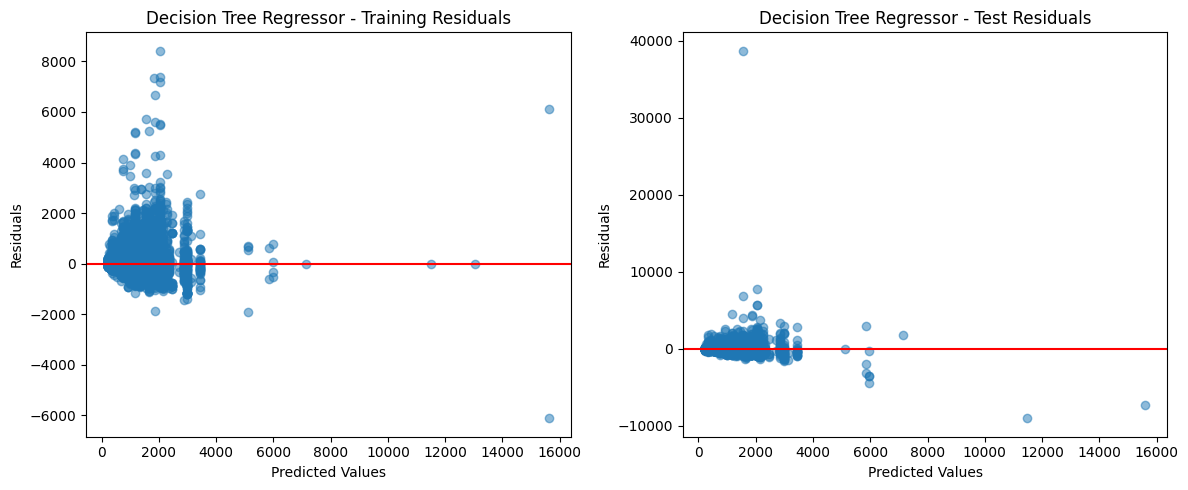

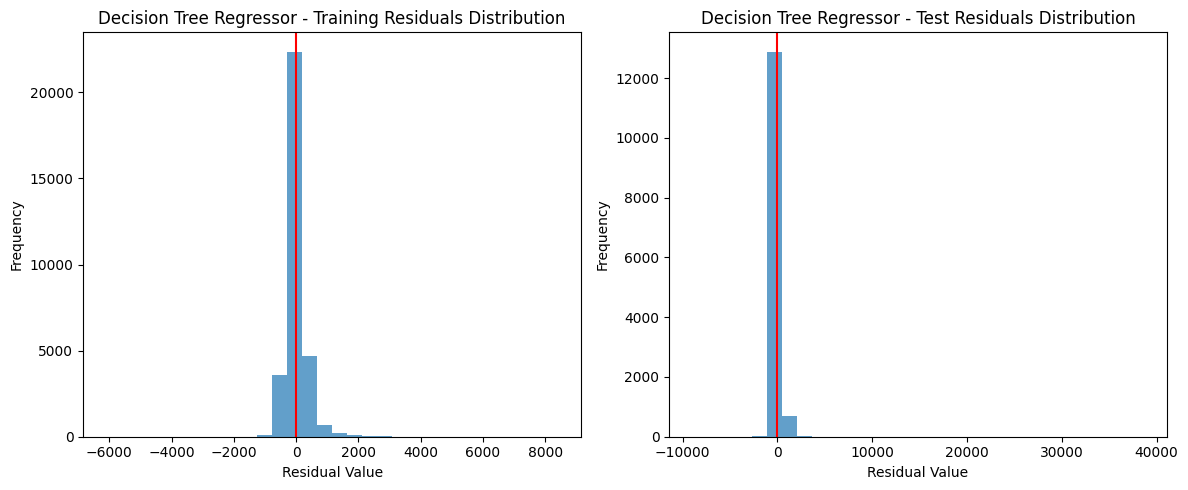

In [50]:
from sklearn.model_selection import GridSearchCV

dt_params = {
    'max_depth': [3 ,6], 
    'min_samples_split': [2,5],
    'criterion': ['squared_error']
}
print(X_train.head())
dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, cv=3, scoring='neg_mean_squared_error')
dt_results = evaluate_model(dt_grid, X_train, X_test, y_train, y_test, "Decision Tree Regressor")


--- Linear Regression ---

Linear Regression with StandardScaler Performance:
Train MSE: 161309.54, Test MSE: 258803.25
Train RMSE: 401.63, Test RMSE: 508.73
Train MAE: 235.35, Test MAE: 237.84
Train R²: 0.6594, Test R²: 0.5464


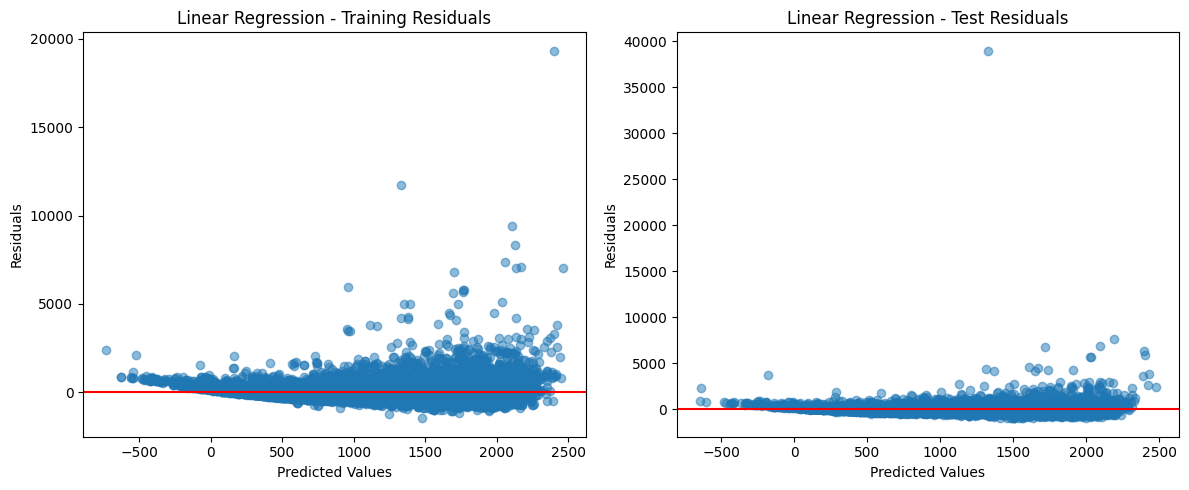

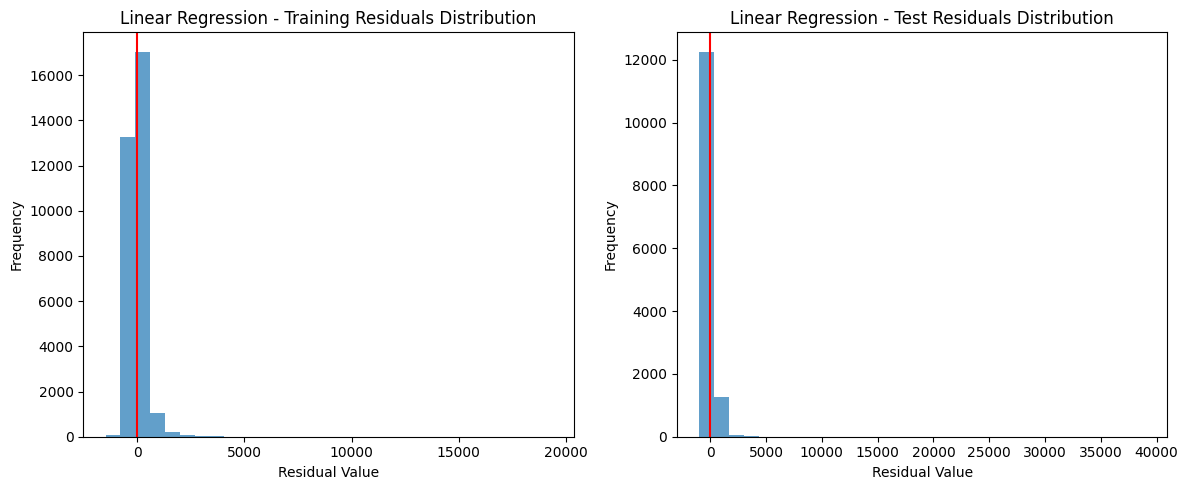


Linear Regression with MinMaxScaler Performance:
Train MSE: 161309.54, Test MSE: 258803.25
Train RMSE: 401.63, Test RMSE: 508.73
Train MAE: 235.35, Test MAE: 237.84
Train R²: 0.6594, Test R²: 0.5464


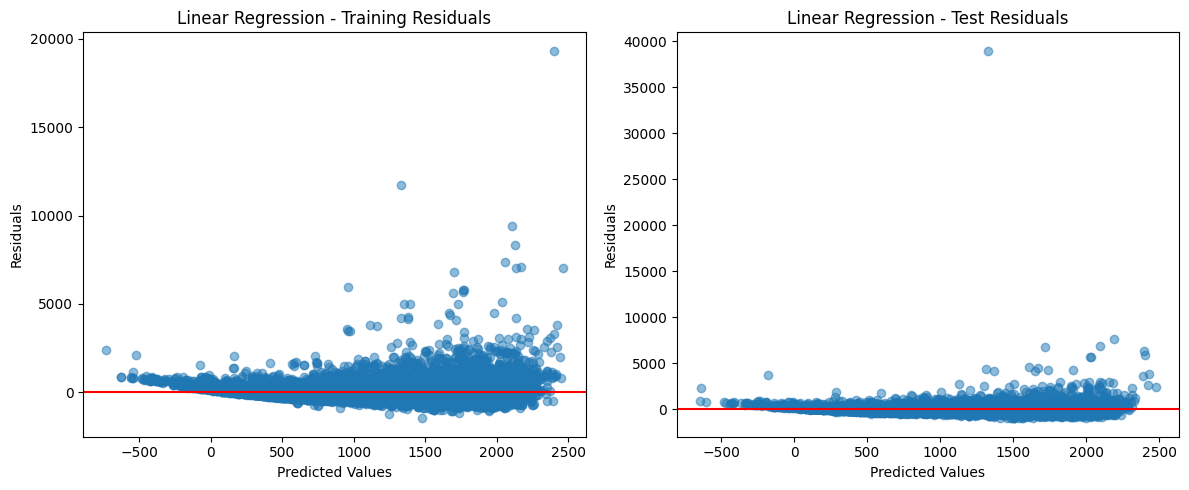

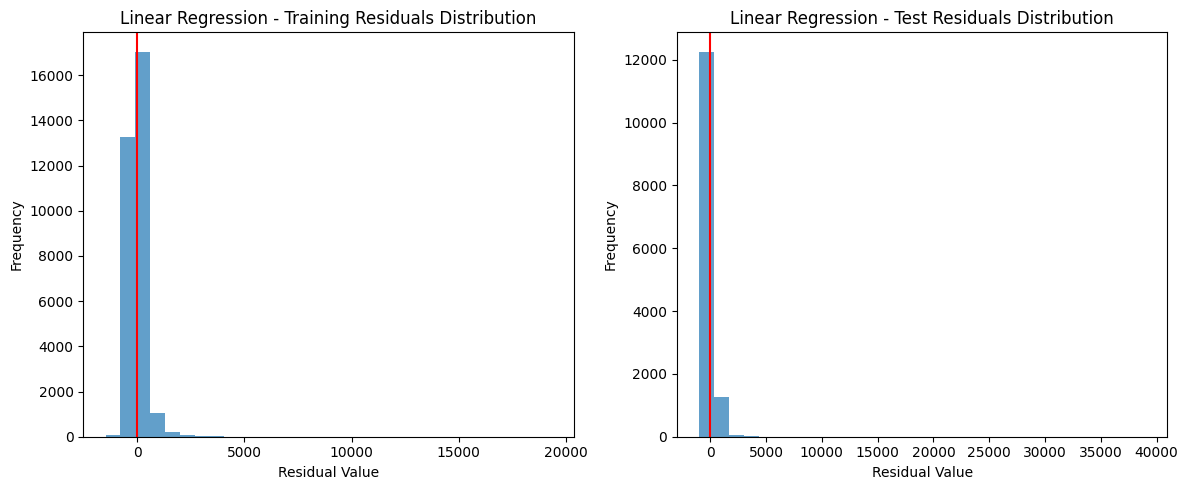


--- Decision Tree Regressor ---

Decision Tree Regressor Performance:
Train MSE: 127230.39, Test MSE: 251068.67
Train RMSE: 356.69, Test RMSE: 501.07
Train MAE: 218.56, Test MAE: 225.20
Train R²: 0.7314, Test R²: 0.5599


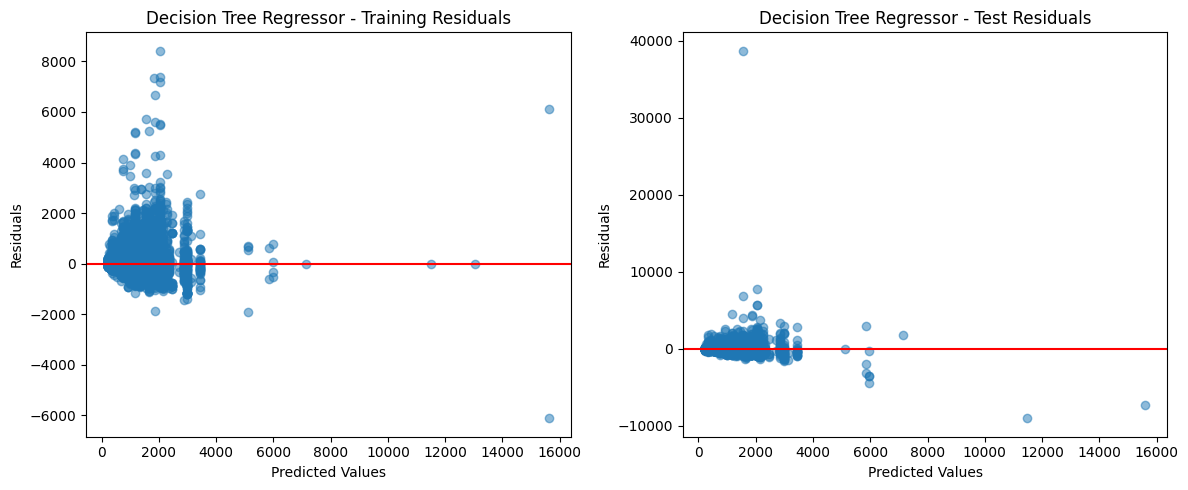

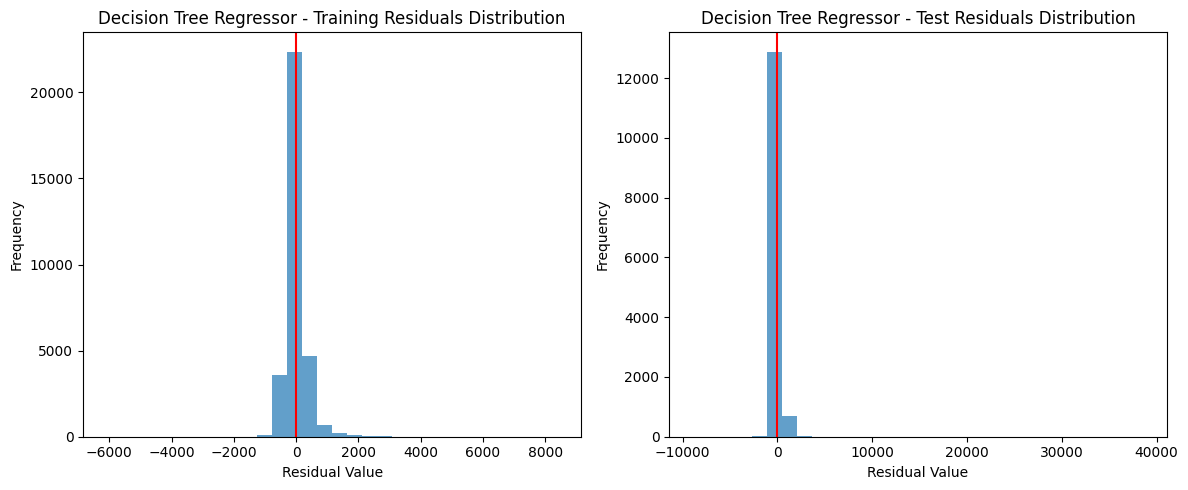

Best parameters: {'criterion': 'squared_error', 'max_depth': 6, 'min_samples_split': 5}

--- Gaussian Process Regressor (Improved) ---

Testing GPR with RBF kernel

Gaussian Process Regressor (RBF) Performance:
Train MSE: 0.00, Test MSE: 381734.56
Train RMSE: 0.00, Test RMSE: 617.85
Train MAE: 0.00, Test MAE: 503.92
Train R²: 1.0000, Test R²: 0.0054


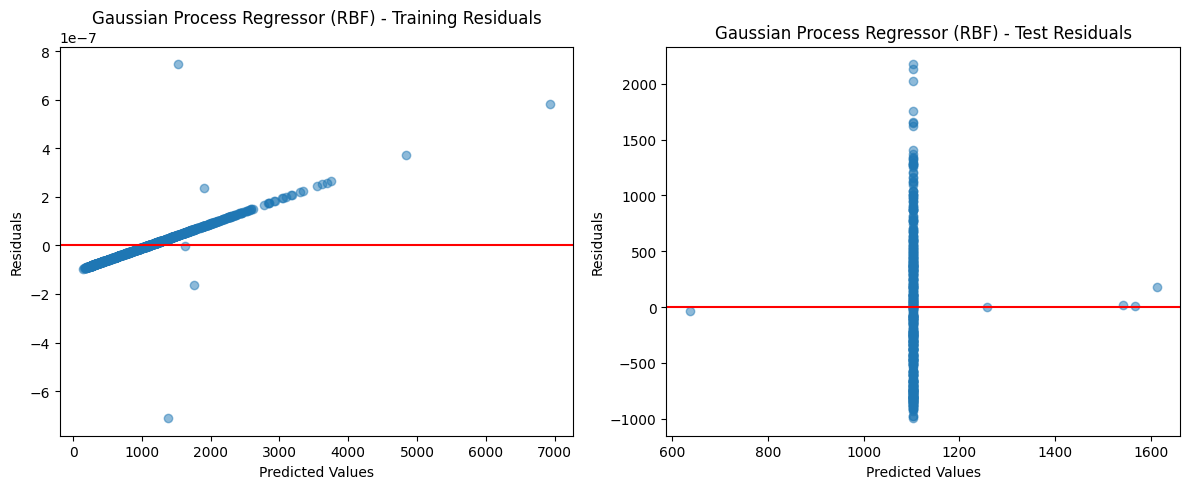

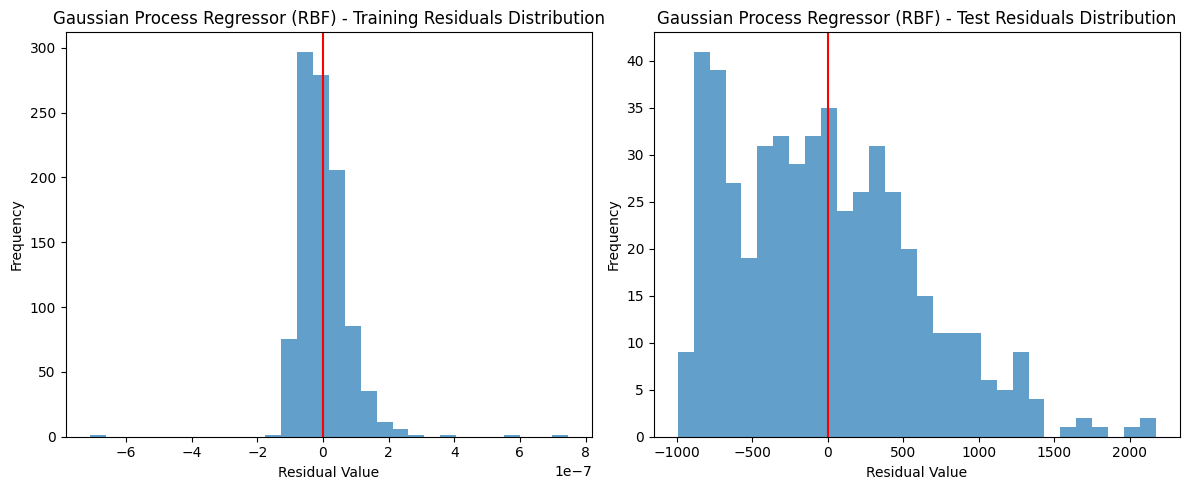


Testing GPR with RBF+White kernel

Gaussian Process Regressor (RBF+White) Performance:
Train MSE: 60126.91, Test MSE: 74648.00
Train RMSE: 245.21, Test RMSE: 273.22
Train MAE: 162.89, Test MAE: 191.52
Train R²: 0.8669, Test R²: 0.8055


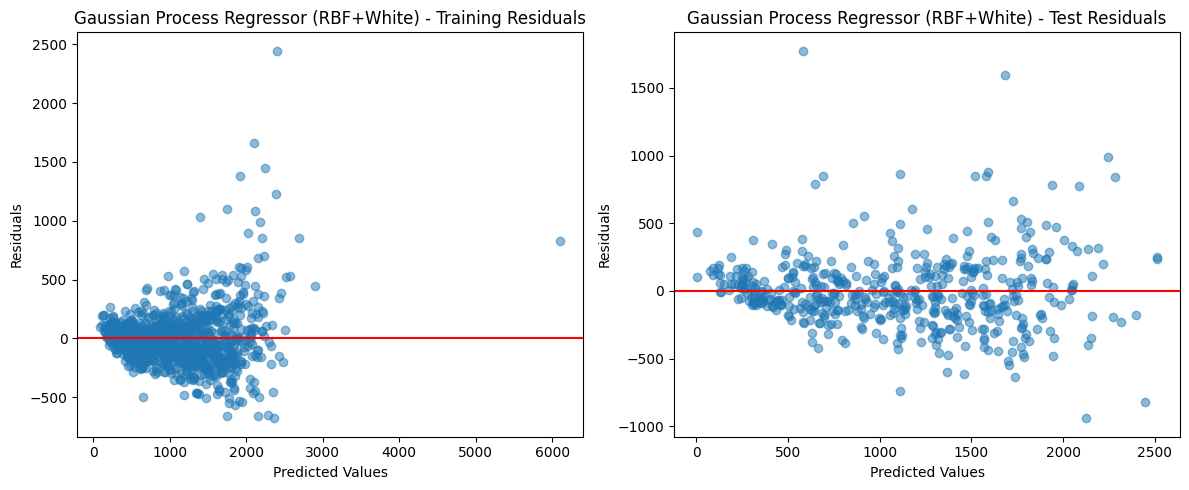

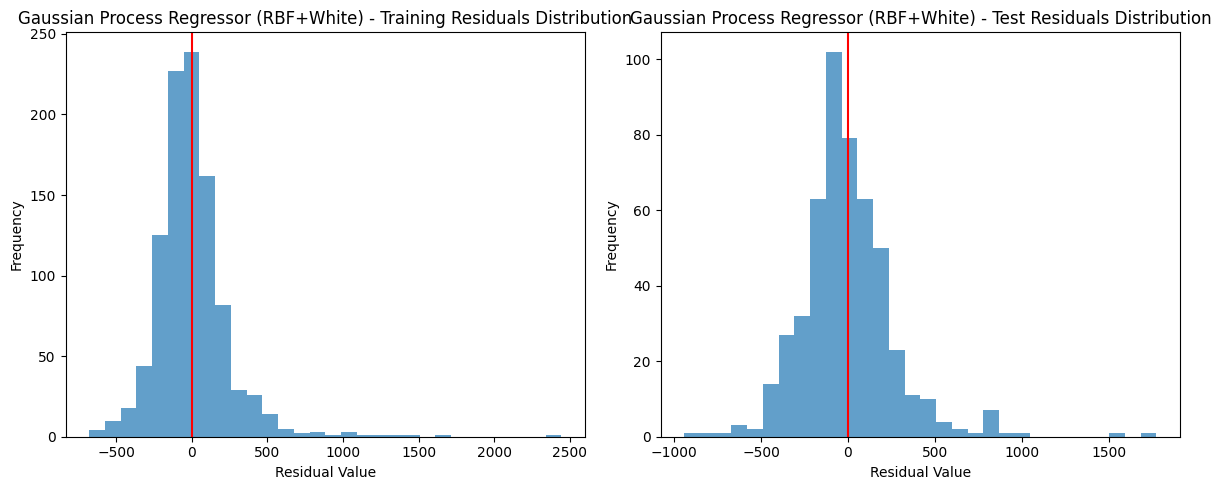


Testing GPR with RQ+White kernel

Gaussian Process Regressor (RQ+White) Performance:
Train MSE: 65065.49, Test MSE: 74204.65
Train RMSE: 255.08, Test RMSE: 272.41
Train MAE: 170.32, Test MAE: 192.02
Train R²: 0.8560, Test R²: 0.8067


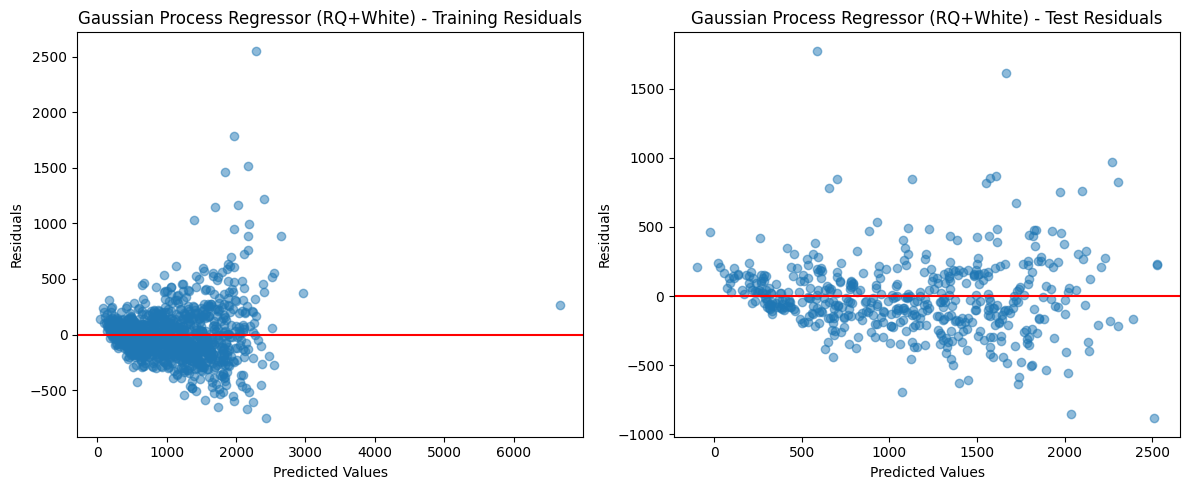

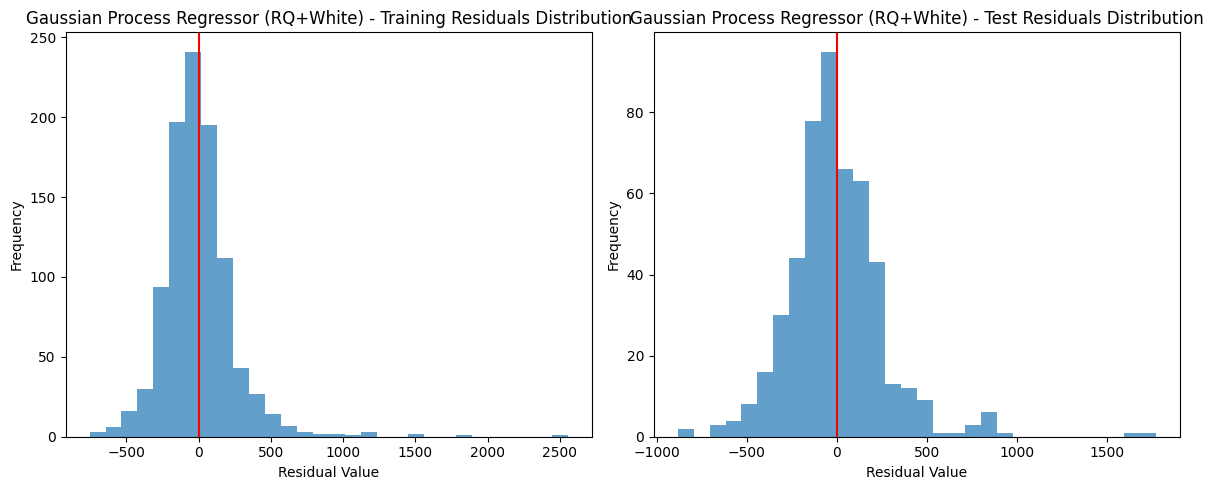


Best GPR kernel: RQ+White with R² score: 0.8067

--- Random Forest Regressor ---

Random Forest (GridSearch) Performance:
Train MSE: 183833.88, Test MSE: 282259.52
Train RMSE: 428.76, Test RMSE: 531.28
Train MAE: 256.69, Test MAE: 261.09
Train R²: 0.6119, Test R²: 0.5053


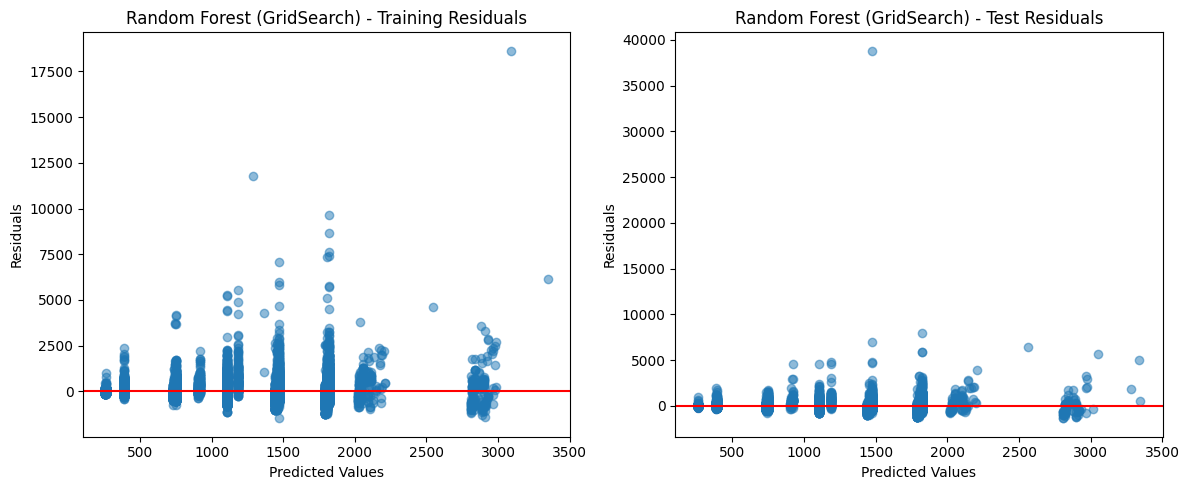

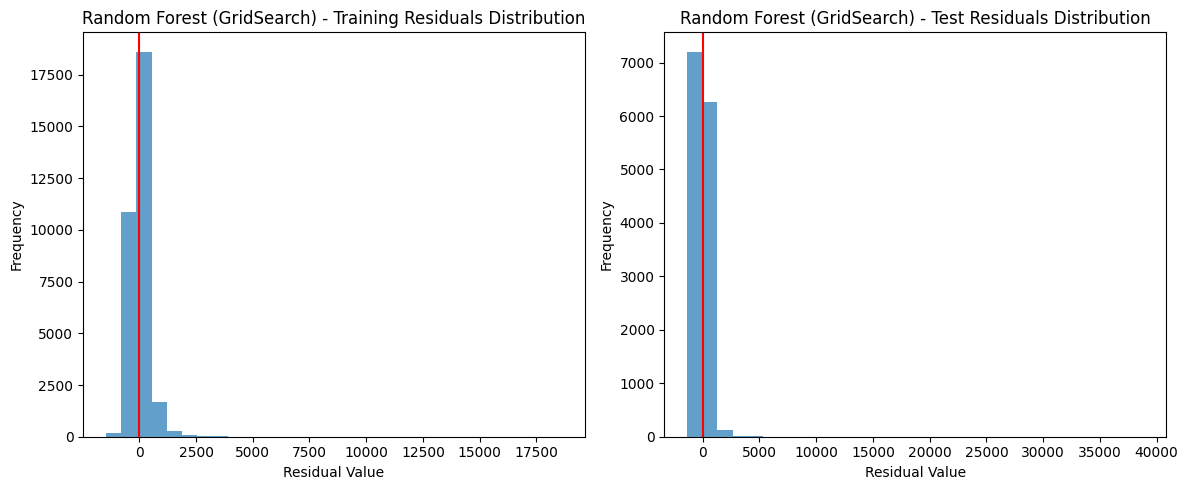

Best RF parameters: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}

--- Gradient Boosting Regressor ---

Gradient Boosting Regressor Performance:
Train MSE: 84854.56, Test MSE: 191948.01
Train RMSE: 291.30, Test RMSE: 438.12
Train MAE: 162.45, Test MAE: 166.46
Train R²: 0.8209, Test R²: 0.6636


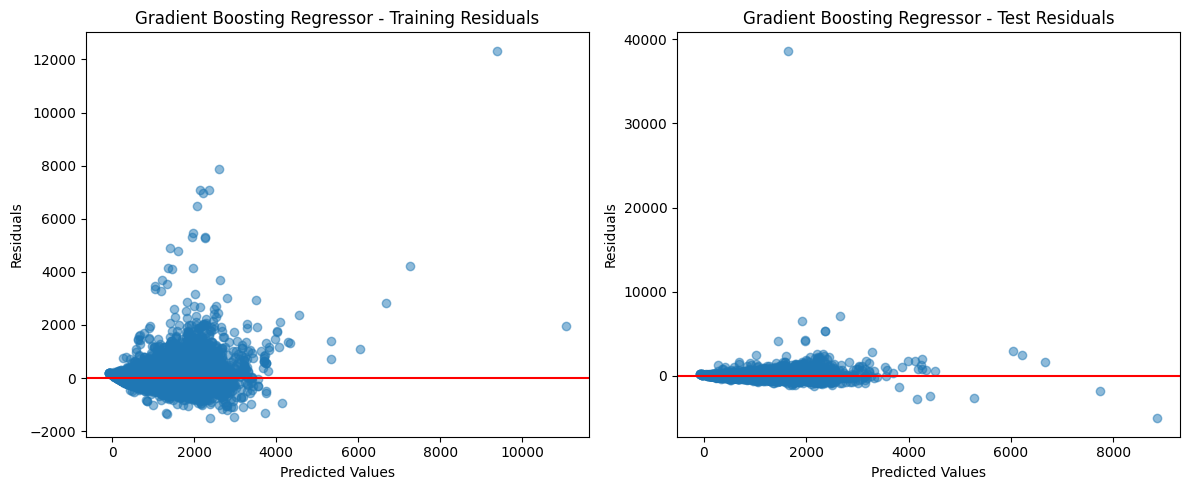

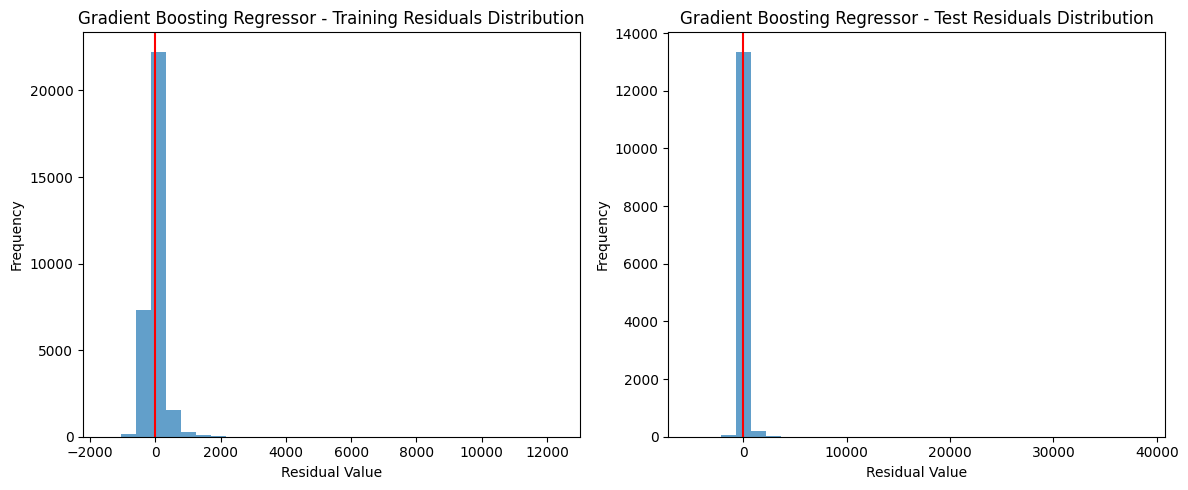


--- Support Vector Regression ---

SVR with linear kernel:

SVR (linear) Performance:
Train MSE: 174432.00, Test MSE: 123847.83
Train RMSE: 417.65, Test RMSE: 351.92
Train MAE: 232.56, Test MAE: 214.72
Train R²: 0.6307, Test R²: 0.6828


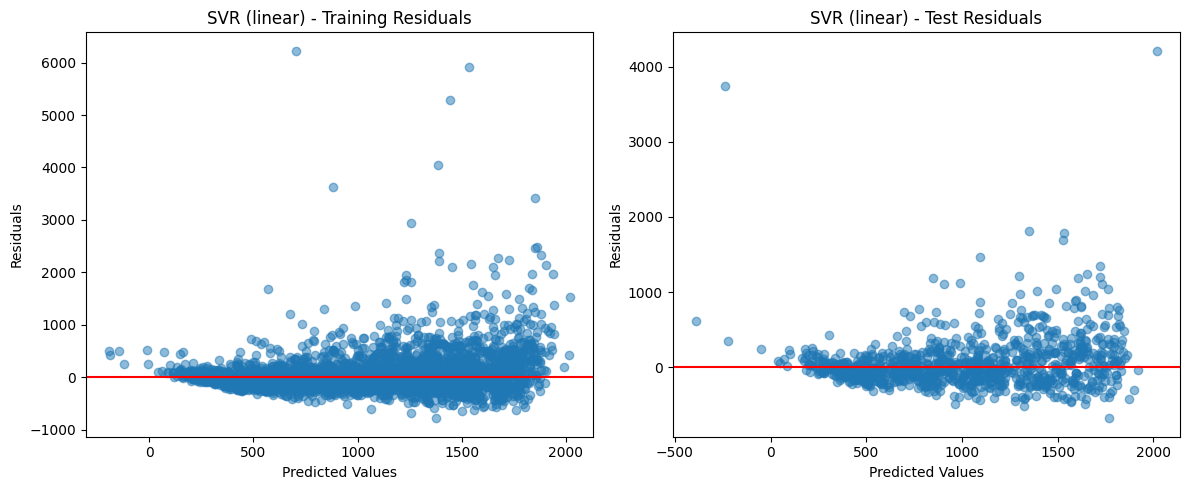

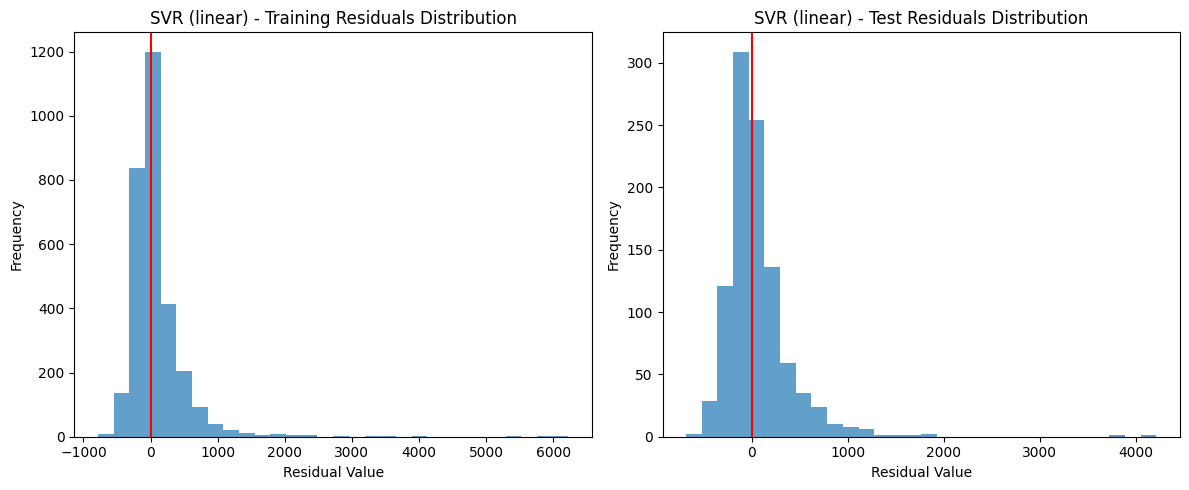


SVR with poly kernel:

SVR (poly) Performance:
Train MSE: 437975.35, Test MSE: 358287.45
Train RMSE: 661.80, Test RMSE: 598.57
Train MAE: 496.29, Test MAE: 468.31
Train R²: 0.0726, Test R²: 0.0823


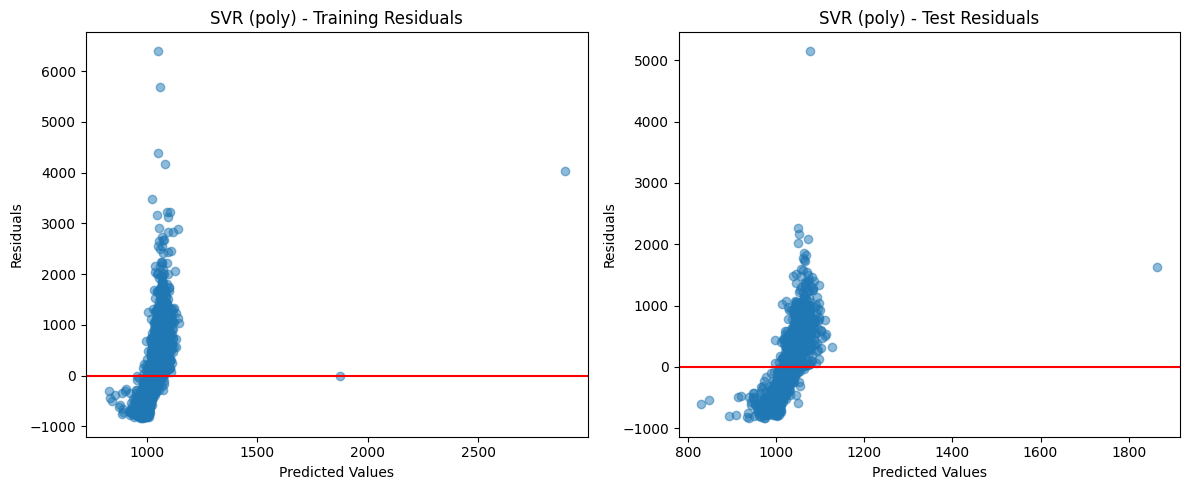

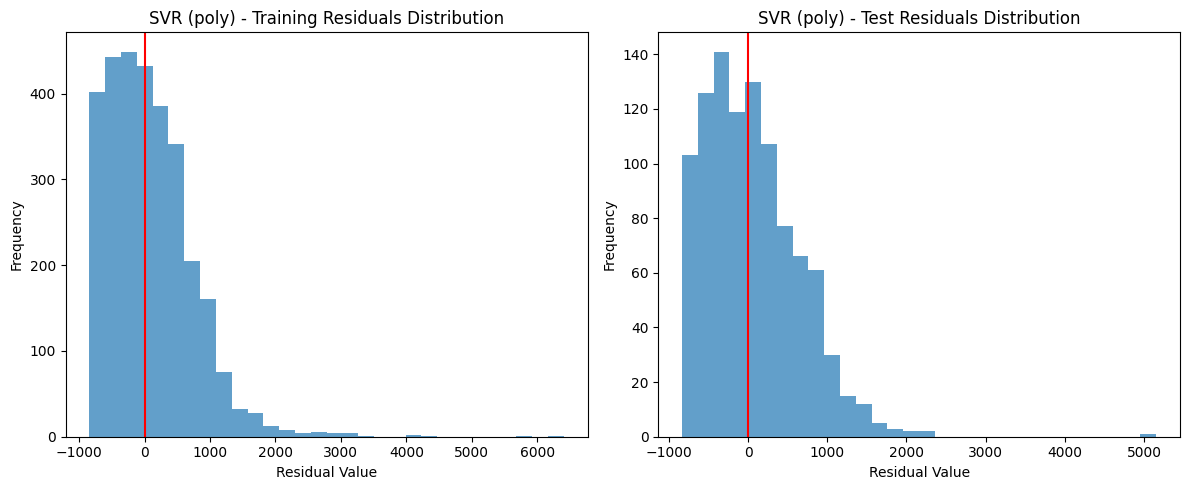


SVR with rbf kernel:

SVR (rbf) Performance:
Train MSE: 435037.30, Test MSE: 352726.81
Train RMSE: 659.57, Test RMSE: 593.91
Train MAE: 489.85, Test MAE: 462.13
Train R²: 0.0789, Test R²: 0.0966


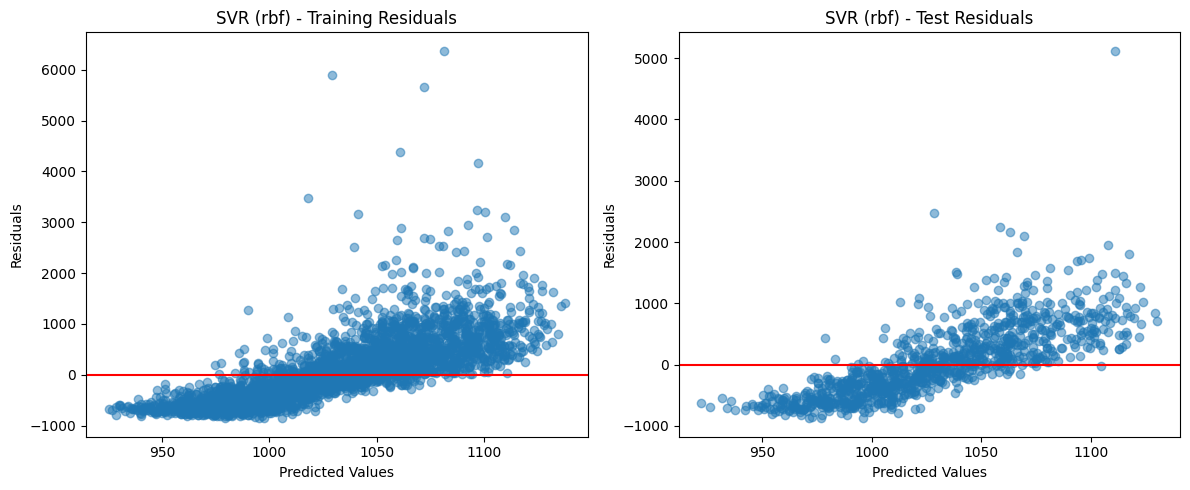

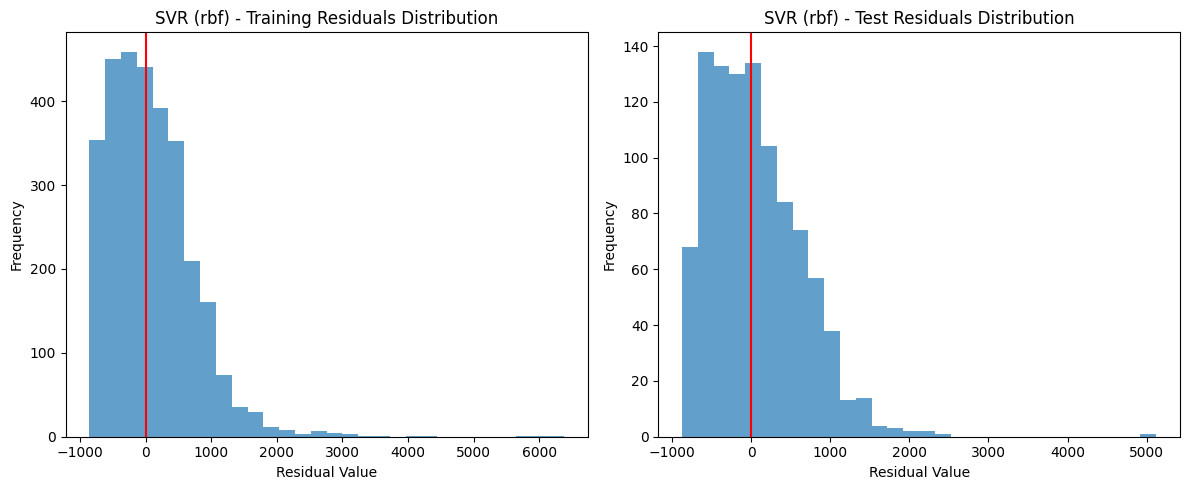


Found 7 traditional ML models for comparison:
  1. Linear Regression (Standard)
  2. Linear Regression (MinMax)
  3. Decision Tree
  4. Gaussian Process (RQ+White)
  5. Random Forest
  6. Gradient Boosting
  7. SVR

=== Traditional ML Model Performance Comparison ===
                       Model       R²        MAE           MSE       RMSE
 Gaussian Process (RQ+White) 0.806665 192.020919  74204.646999 272.405299
           Gradient Boosting 0.663552 166.455320 191948.008110 438.118715
               Decision Tree 0.559925 225.200467 251068.669764 501.067530
  Linear Regression (MinMax) 0.546368 237.842634 258803.246416 508.727084
Linear Regression (Standard) 0.546368 237.842634 258803.246416 508.727084
               Random Forest 0.505253 261.093597 282259.523420 531.281021
                         SVR 0.096567 462.134333 352726.809274 593.908082


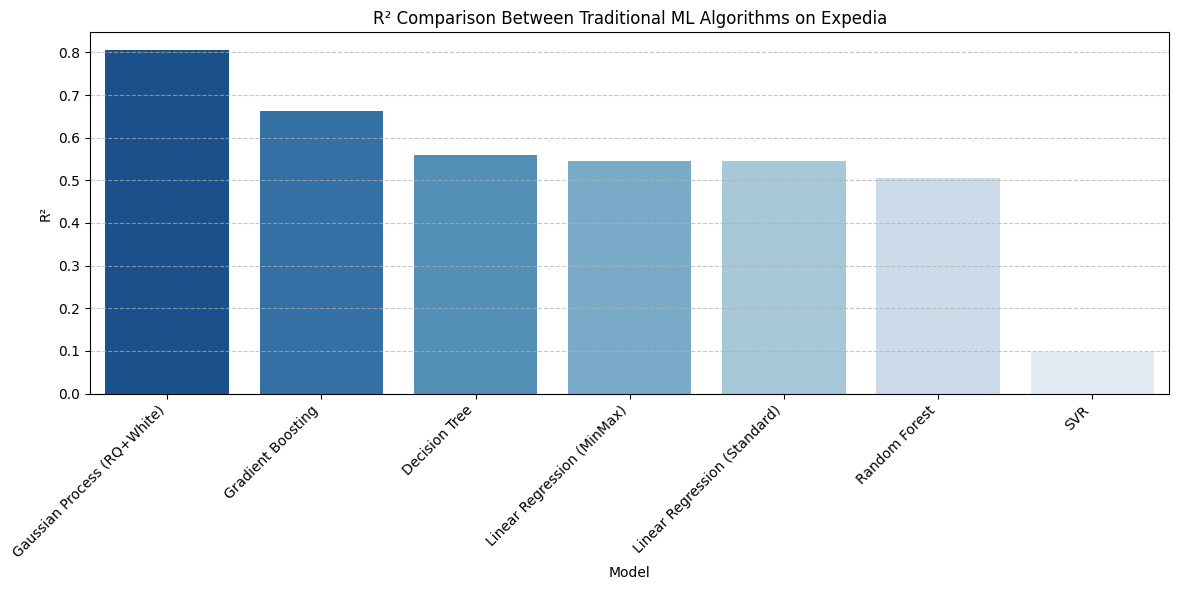

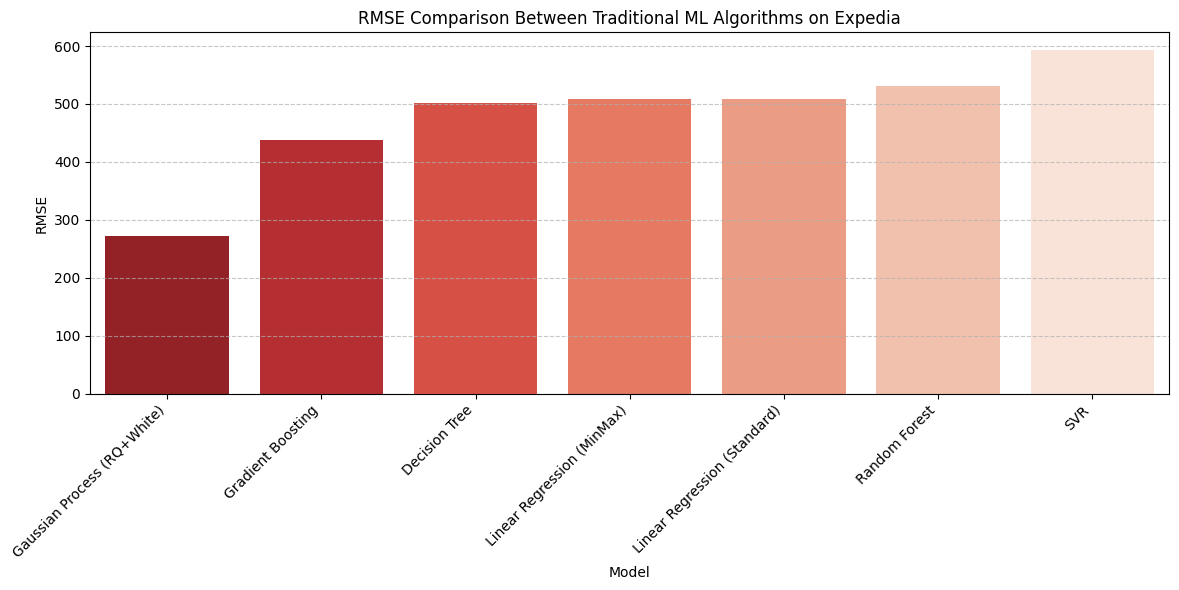

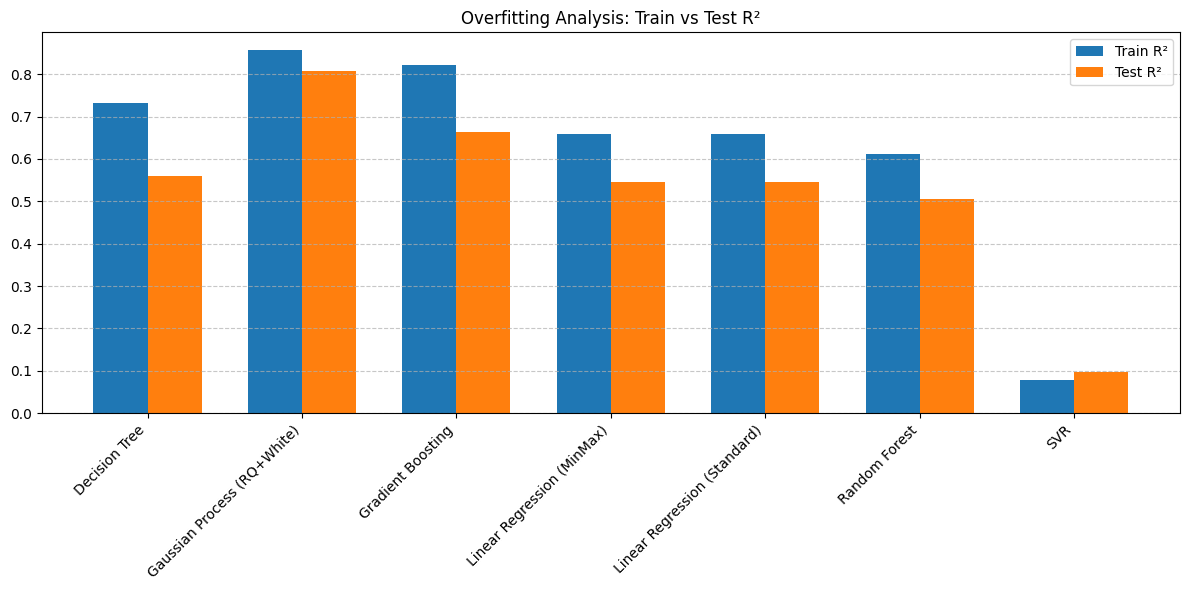

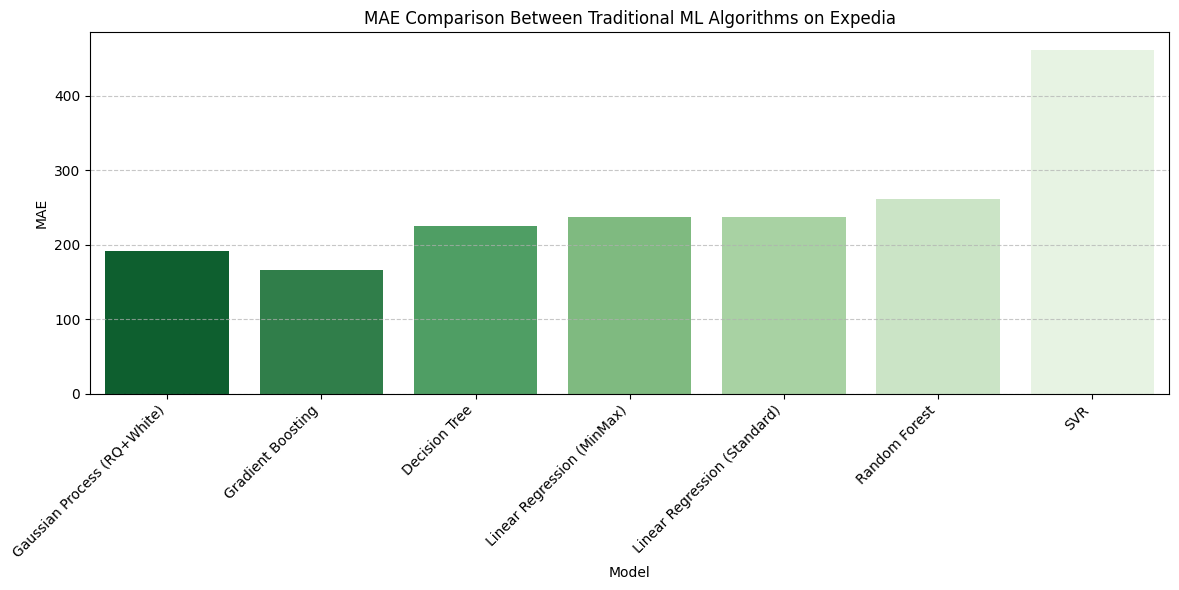


=== Best Performing Traditional ML Model ===
Model: Gaussian Process (RQ+White)
R² Score: 0.8067
RMSE: 272.41
MAE: 192.02


,Model,R²,MAE,MSE,RMSE,Train R²,Overfitting
3,Gaussian Process (RQ+White),0.806665,192.020919,74204.646999,272.405299,0.855995,0.049331
5,Gradient Boosting,0.663552,166.455320,191948.008110,438.118715,0.820857,0.157305
2,Decision Tree,0.559925,225.200467,251068.669764,501.067530,0.731394,0.171469
1,Linear Regression (MinMax),0.546368,237.842634,258803.246416,508.727084,0.659447,0.113080
0,Linear Regression (Standard),0.546368,237.842634,258803.246416,508.727084,0.659447,0.113080
4,Random Forest,0.505253,261.093597,282259.523420,531.281021,0.611894,0.106641
6,SVR,0.096567,462.134333,352726.809274,593.908082,0.078852,-0.017715


In [ ]:
# Linear Regression
print("\n--- Linear Regression ---")
lr_model = LinearRegression()
lr_results_std = evaluate_model(lr_model, X_train_std, X_test_std, y_train, y_test, 
                               "Linear Regression", "StandardScaler")

# Try with different scaling methods to compare
lr_model_minmax = LinearRegression()
lr_results_minmax = evaluate_model(lr_model_minmax, X_train_minmax, X_test_minmax, y_train, y_test, 
                                  "Linear Regression", "MinMaxScaler")

# Decision Tree Regressor with different parameters
print("\n--- Decision Tree Regressor ---")
dt_params = {
    'max_depth': [3 ,6], 
    'min_samples_split': [2,5],
    'criterion': ['squared_error']
}
dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, cv=3, scoring='neg_mean_squared_error')
dt_results = evaluate_model(dt_grid, X_train, X_test, y_train, y_test, "Decision Tree Regressor")
print(f"Best parameters: {dt_grid.best_params_}")

# Gaussian Process Regressor
print("\n--- Gaussian Process Regressor (Improved) ---")

# Use stratified sampling for better representation (if possible)
sample_size = min(1000, len(X_train))
test_sample_size = min(500, len(X_test))

# Create a smaller sample for GPR
np.random.seed(42)
train_indices = np.random.choice(len(X_train_std), sample_size, replace=False)
test_indices = np.random.choice(len(X_test_std), test_sample_size, replace=False)

X_train_sample = X_train_std[train_indices]
y_train_sample = y_train.iloc[train_indices]
X_test_sample = X_test_std[test_indices]
y_test_sample = y_test.iloc[test_indices]

#kernel configurations
kernels = [
    ("RBF", RBF(length_scale=1.0)),
    ("RBF+White", RBF(length_scale=1.0) + WhiteKernel(noise_level=0.1)),  # Reduced noise
    ("RQ+White", RBF(length_scale=1.0) * ConstantKernel(1.0) + WhiteKernel(noise_level=0.1))
]

best_gpr_score = float('-inf')
best_gpr_model = None
best_gpr_kernel_name = ""

for kernel_name, kernel in kernels:
    print(f"\nTesting GPR with {kernel_name} kernel")
    # Add normalize_y=True to handle scale issues
    gpr_model = GaussianProcessRegressor(
        kernel=kernel, 
        n_restarts_optimizer=5, 
        normalize_y=True,  
        random_state=42
    )
    
    try:
        gpr_results = evaluate_model(gpr_model, X_train_sample, X_test_sample, 
                                    y_train_sample, y_test_sample, 
                                    f"Gaussian Process Regressor ({kernel_name})")
        
        # Track the best GPR model
        if gpr_results['test_r2'] > best_gpr_score:
            best_gpr_score = gpr_results['test_r2']
            best_gpr_model = gpr_model
            best_gpr_kernel_name = kernel_name
            
    except Exception as e:
        print(f"Error with {kernel_name} kernel: {e}")

print(f"\nBest GPR kernel: {best_gpr_kernel_name} with R² score: {best_gpr_score:.4f}")

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
print("\n--- Random Forest Regressor ---")

# Quick grid search for Random Forest
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [2, 3],
    'min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=3, 
                      scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid_results = evaluate_model(rf_grid, X_train, X_test, y_train, y_test, "Random Forest (GridSearch)")
print(f"Best RF parameters: {rf_grid.best_params_}")

# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
print("\n--- Gradient Boosting Regressor ---")

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_results = evaluate_model(gb_model, X_train, X_test, y_train, y_test, "Gradient Boosting Regressor")

# Support Vector Regression
from sklearn.svm import SVR
print("\n--- Support Vector Regression ---")

# Sample the data for SVR - it can be slow on large datasets
sample_size_svr = min(3000, len(X_train))
test_sample_size_svr = min(1000, len(X_test))

# Create a smaller sample for SVR
X_train_sample_svr = X_train_std[:sample_size_svr]
y_train_sample_svr = y_train.iloc[:sample_size_svr]
X_test_sample_svr = X_test_std[:test_sample_size_svr]
y_test_sample_svr = y_test.iloc[:test_sample_size_svr]

# Try different kernels for SVR
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    print(f"\nSVR with {kernel} kernel:")
    svr_model = SVR(kernel=kernel, C=1.0, epsilon=0.1)
    try:
        svr_kernel_results = evaluate_model(
            svr_model, 
            X_train_sample_svr, 
            X_test_sample_svr, 
            y_train_sample_svr, 
            y_test_sample_svr,
            f"SVR ({kernel})"
        )
    except Exception as e:
        print(f"Error with SVR {kernel} kernel: {e}")


def compare_models(): 
    # Get all variables from global scope
    globals_dict = globals()
    
    # Initialize results list
    results = []
    
    # Track models found for reporting
    models_found = []
    
    # 1. LINEAR REGRESSION
    try:
        if 'lr_results_std' in globals_dict:
            results.append({
                'Model': 'Linear Regression (Standard)',
                'R²': globals_dict['lr_results_std']['test_r2'],
                'MAE': globals_dict['lr_results_std']['test_mae'],
                'MSE': globals_dict['lr_results_std']['test_mse'],
                'RMSE': globals_dict['lr_results_std']['test_rmse'],
                'Train R²': globals_dict['lr_results_std']['train_r2']
            })
            models_found.append("Linear Regression (Standard)")
        
        if 'lr_results_minmax' in globals_dict:
            results.append({
                'Model': 'Linear Regression (MinMax)',
                'R²': globals_dict['lr_results_minmax']['test_r2'],
                'MAE': globals_dict['lr_results_minmax']['test_mae'],
                'MSE': globals_dict['lr_results_minmax']['test_mse'],
                'RMSE': globals_dict['lr_results_minmax']['test_rmse'],
                'Train R²': globals_dict['lr_results_minmax']['train_r2']
            })
            models_found.append("Linear Regression (MinMax)")
    except Exception as e:
        print(f"Error adding Linear Regression models: {e}")
    
    # 2. DECISION TREE
    try:
        if 'dt_results' in globals_dict:
            results.append({
                'Model': 'Decision Tree',
                'R²': globals_dict['dt_results']['test_r2'],
                'MAE': globals_dict['dt_results']['test_mae'],
                'MSE': globals_dict['dt_results']['test_mse'],
                'RMSE': globals_dict['dt_results']['test_rmse'],
                'Train R²': globals_dict['dt_results']['train_r2']
            })
            models_found.append("Decision Tree")
    except Exception as e:
        print(f"Error adding Decision Tree: {e}")
    
    # 3. GAUSSIAN PROCESS REGRESSOR
    try:
        if 'best_gpr_score' in globals_dict and 'best_gpr_kernel_name' in globals_dict:
            # Find full GPR results if available
            gpr_results = None
            for var_name, var_val in globals_dict.items():
                if var_name.startswith('gpr_results') and isinstance(var_val, dict):
                    if var_val['test_r2'] == globals_dict['best_gpr_score']:
                        gpr_results = var_val
                        break
            
            if gpr_results:
                results.append({
                    'Model': f"Gaussian Process ({globals_dict['best_gpr_kernel_name']})",
                    'R²': gpr_results['test_r2'],
                    'MAE': gpr_results['test_mae'],
                    'MSE': gpr_results['test_mse'],
                    'RMSE': gpr_results['test_rmse'],
                    'Train R²': gpr_results['train_r2']
                })
            else:
                # If full results not found, add with just R² score
                results.append({
                    'Model': f"Gaussian Process ({globals_dict['best_gpr_kernel_name']})",
                    'R²': globals_dict['best_gpr_score'],
                    'MAE': np.nan,
                    'MSE': np.nan,
                    'RMSE': np.nan,
                    'Train R²': np.nan
                })
            models_found.append(f"Gaussian Process ({globals_dict['best_gpr_kernel_name']})")
    except Exception as e:
        print(f"Error adding Gaussian Process Regressor: {e}")
    
    # 4. RANDOM FOREST
    try:
        if 'rf_grid_results' in globals_dict:
            results.append({
                'Model': 'Random Forest',
                'R²': globals_dict['rf_grid_results']['test_r2'],
                'MAE': globals_dict['rf_grid_results']['test_mae'],
                'MSE': globals_dict['rf_grid_results']['test_mse'],
                'RMSE': globals_dict['rf_grid_results']['test_rmse'],
                'Train R²': globals_dict['rf_grid_results']['train_r2']
            })
            models_found.append("Random Forest")
    except Exception as e:
        print(f"Error adding Random Forest: {e}")
    
    # 5. GRADIENT BOOSTING
    try:
        if 'gb_results' in globals_dict:
            results.append({
                'Model': 'Gradient Boosting',
                'R²': globals_dict['gb_results']['test_r2'],
                'MAE': globals_dict['gb_results']['test_mae'],
                'MSE': globals_dict['gb_results']['test_mse'],
                'RMSE': globals_dict['gb_results']['test_rmse'],
                'Train R²': globals_dict['gb_results']['train_r2']
            })
            models_found.append("Gradient Boosting")
    except Exception as e:
        print(f"Error adding Gradient Boosting: {e}")
    
    # 6. SUPPORT VECTOR REGRESSION
    try:
        # Check for different kernel results
        for kernel in ['linear', 'poly', 'rbf']:
            var_name = f'svr_kernel_results_{kernel}'
            if var_name in globals_dict:
                results.append({
                    'Model': f'SVR ({kernel})',
                    'R²': globals_dict[var_name]['test_r2'],
                    'MAE': globals_dict[var_name]['test_mae'],
                    'MSE': globals_dict[var_name]['test_mse'],
                    'RMSE': globals_dict[var_name]['test_rmse'],
                    'Train R²': globals_dict[var_name]['train_r2']
                })
                models_found.append(f"SVR ({kernel})")
        
        # Check for generic SVR results
        if 'svr_kernel_results' in globals_dict:
            results.append({
                'Model': 'SVR',
                'R²': globals_dict['svr_kernel_results']['test_r2'],
                'MAE': globals_dict['svr_kernel_results']['test_mae'],
                'MSE': globals_dict['svr_kernel_results']['test_mse'],
                'RMSE': globals_dict['svr_kernel_results']['test_rmse'],
                'Train R²': globals_dict['svr_kernel_results']['train_r2']
            })
            models_found.append("SVR")
    except Exception as e:
        print(f"Error adding SVR models: {e}")
    
    # Print summary of models found
    print(f"\nFound {len(models_found)} traditional ML models for comparison:")
    for i, model in enumerate(models_found, 1):
        print(f"  {i}. {model}")
    
    # Convert to DataFrame
    if results:
        results_df = pd.DataFrame(results)
        
        # Sort by R² (descending)
        results_df = results_df.sort_values(by='R²', ascending=False)
        
        # Display as table
        print("\n=== Traditional ML Model Performance Comparison ===")
        print(results_df[['Model', 'R²', 'MAE', 'MSE', 'RMSE']].to_string(index=False))
        
        # ========== Create Visualizations ==========
        
        # 1. R² Comparison
        plt.figure(figsize=(12, 6))
        plt.title('R² Comparison Between Traditional ML Algorithms on Expedia')
        ax = sns.barplot(data=results_df, x='Model', y='R²', palette='Blues_r')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
        
        # 2. RMSE Comparison
        plt.figure(figsize=(12, 6))
        plt.title('RMSE Comparison Between Traditional ML Algorithms on Expedia')
        ax = sns.barplot(data=results_df, x='Model', y='RMSE', palette='Reds_r')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
        
        # 3. Overfitting Analysis
        results_df['Overfitting'] = results_df['Train R²'] - results_df['R²']
        results_df_sorted = results_df.sort_values(by='Model')
        
        # Only include models that have both train and test R²
        mask = ~(results_df_sorted['Train R²'].isna() | results_df_sorted['R²'].isna())
        results_df_filtered = results_df_sorted[mask]
        
        if not results_df_filtered.empty:
            plt.figure(figsize=(12, 6))
            plt.title('Overfitting Analysis: Train vs Test R²')
            x = np.arange(len(results_df_filtered))
            width = 0.35
            plt.bar(x - width/2, results_df_filtered['Train R²'], width, label='Train R²')
            plt.bar(x + width/2, results_df_filtered['R²'], width, label='Test R²')
            plt.xticks(x, results_df_filtered['Model'], rotation=45, ha='right')
            plt.legend()
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()
        
        # 4. MAE Comparison
        plt.figure(figsize=(12, 6))
        plt.title('MAE Comparison Between Traditional ML Algorithms on Expedia')
        ax = sns.barplot(data=results_df, x='Model', y='MAE', palette='Greens_r')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
        
        # ========== Identify Best Model ==========
        best_model = results_df.iloc[0]['Model']
        best_r2 = results_df.iloc[0]['R²']
        print(f"\n=== Best Performing Traditional ML Model ===")
        print(f"Model: {best_model}")
        print(f"R² Score: {best_r2:.4f}")
        print(f"RMSE: {results_df.iloc[0]['RMSE']:.2f}")
        print(f"MAE: {results_df.iloc[0]['MAE']:.2f}")
        
        
        return results_df
    else:
        print("No model results found. Please check that models have been trained and evaluated.")
        return None

compare_models()

הקוד של אופיר:

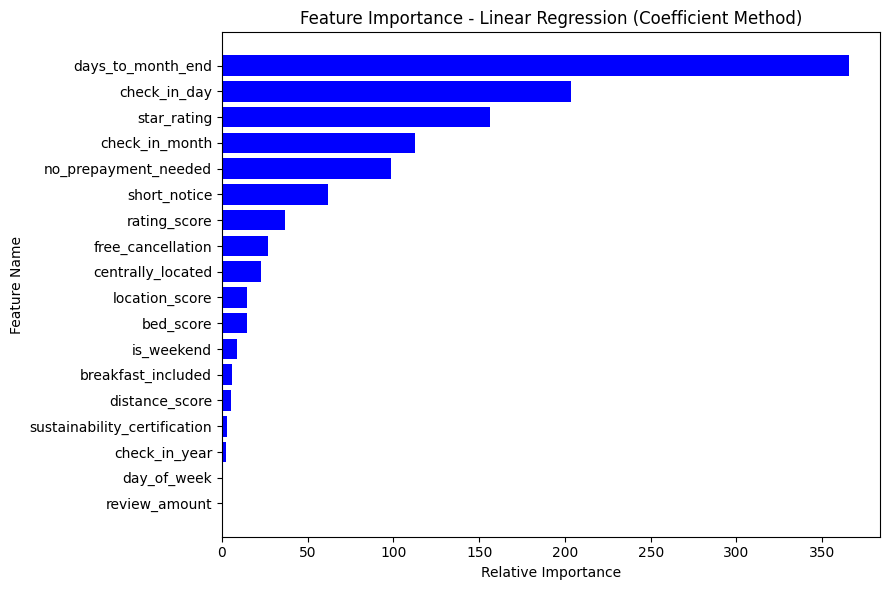


Linear Regression Feature Importance:
                         Feature  Importance
0              days_to_month_end  365.476814
1                   check_in_day  203.409238
2                    star_rating  156.368410
3                 check_in_month  112.425675
4           no_prepayment_needed   98.539444
5                   short_notice   61.663335
6                   rating_score   36.521511
7              free_cancellation   26.675591
8              centrally_located   22.996855
9                 location_score   14.712406
10                     bed_score   14.577106
11                    is_weekend    8.936803
12            breakfast_included    5.984004
13                distance_score    5.329449
14  sustainability_certification    3.000084
15                 check_in_year    2.339725
16                   day_of_week    0.099505
17                 review_amount    0.018510


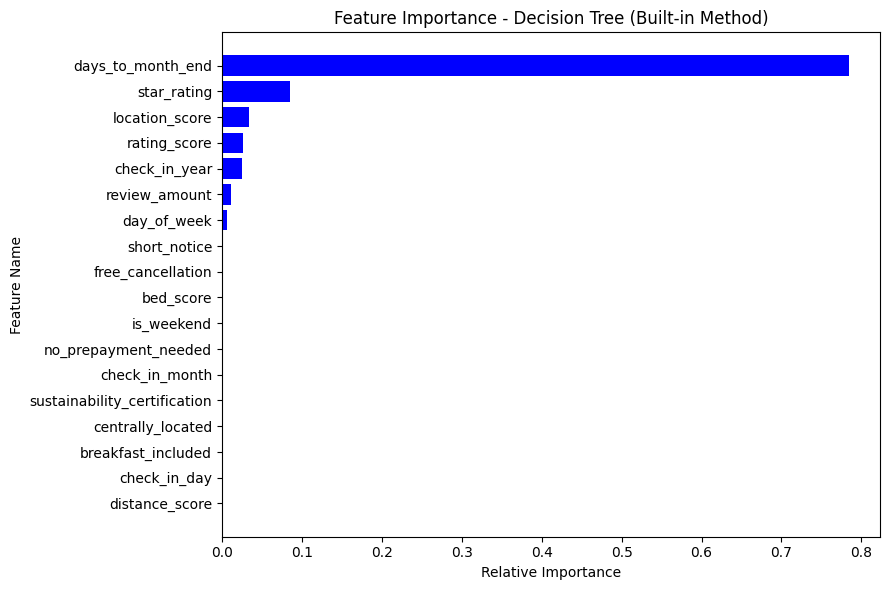


Decision Tree Feature Importance (Built-in Method):
                         Feature  Importance
0                 distance_score    0.000000
1                   check_in_day    0.000000
2             breakfast_included    0.000000
3              centrally_located    0.000000
4   sustainability_certification    0.000000
5                 check_in_month    0.000000
6           no_prepayment_needed    0.000017
7                     is_weekend    0.000761
8                      bed_score    0.000914
9              free_cancellation    0.001353
10                  short_notice    0.001994
11                   day_of_week    0.006954
12                 review_amount    0.011091
13                 check_in_year    0.024715
14                  rating_score    0.026067
15                location_score    0.033301
16                   star_rating    0.085244
17             days_to_month_end    0.784025


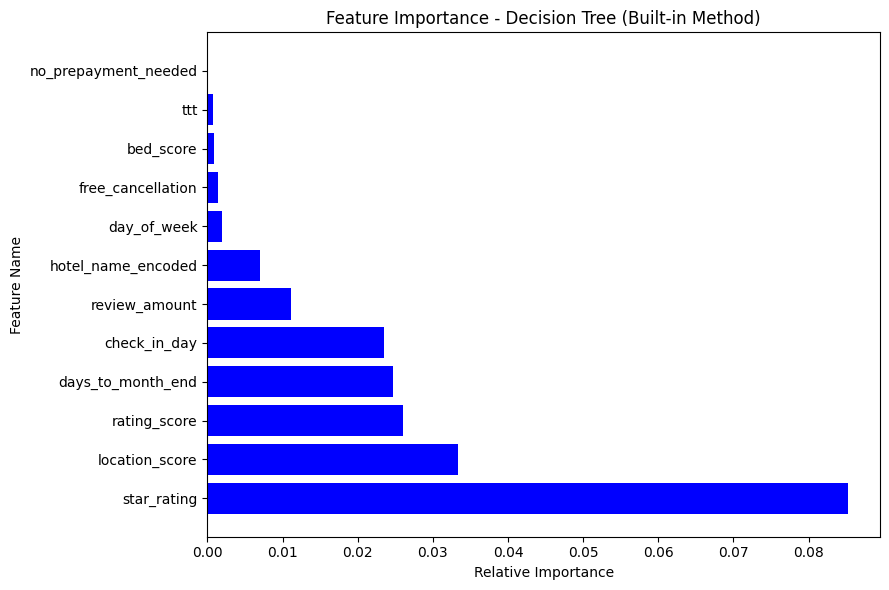


Decision Tree Feature Importance (Built-in Method):
                 Feature  Importance
0            star_rating    0.085244
1         location_score    0.033301
2           rating_score    0.026067
3      days_to_month_end    0.024715
4           check_in_day    0.023563
5          review_amount    0.011091
6     hotel_name_encoded    0.006954
7            day_of_week    0.001994
8      free_cancellation    0.001353
9              bed_score    0.000914
10                   ttt    0.000761
11  no_prepayment_needed    0.000017


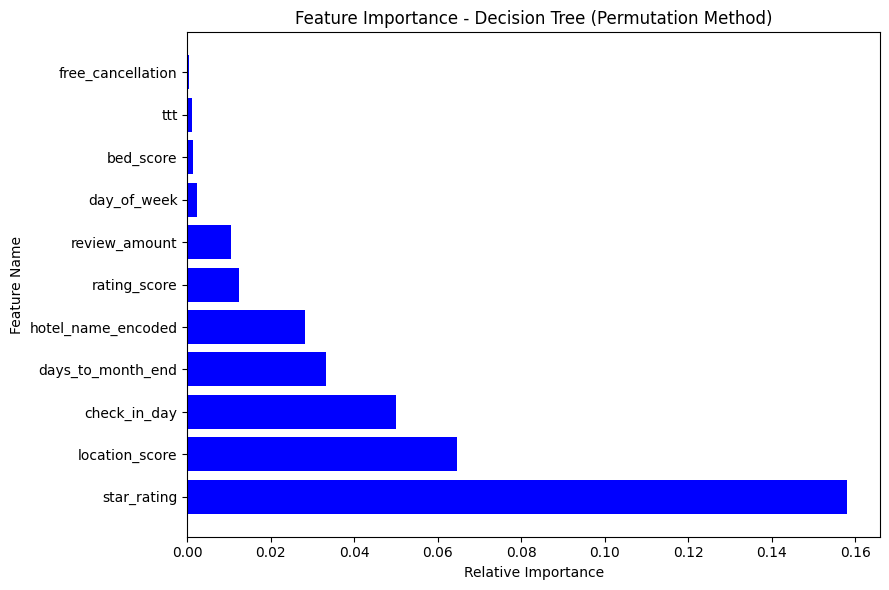


Decision Tree Feature Importance (Permutation Method):
               Feature  Importance
0          star_rating    0.157995
1       location_score    0.064569
2         check_in_day    0.050035
3    days_to_month_end    0.033231
4   hotel_name_encoded    0.028137
5         rating_score    0.012477
6        review_amount    0.010410
7          day_of_week    0.002298
8            bed_score    0.001296
9                  ttt    0.001164
10   free_cancellation    0.000320


In [52]:
# 1. Linear Regression Feature Importance - Coefficient Method

# רשימת עמודות שאינן פיצ'רים
exclude_cols = ['price', 'snapshot', 'checkin', 'checkout', 'ttt', 'los', 'hotel_name_encoded', 'group_index','hotel_name']  
feature_cols = [col for col in df.columns if col not in exclude_cols]  # שמות הפיצ'רים בפועל

# הפיכת שמות הפיצ'רים למערך NumPy
feature_names = np.array(feature_cols)

# יצירת והכשרת המודל
lr = LinearRegression()
lr.fit(X_train, y_train)

# חישוב החשיבות של כל פיצ'ר
lr_importances = np.abs(lr.coef_)

# מיון האינדקסים של החשיבויות בסדר יורד
lr_indices = np.argsort(lr_importances)[::-1]

# סינון אינדקסים חוקיים בלבד
valid_indices = [i for i in lr_indices if i < len(feature_names)]
valid_feature_names = feature_names[valid_indices]  # שמות הפיצ'רים התואמים
valid_lr_importances = lr_importances[valid_indices]  # ערכי החשיבות התואמים

# שרטוט הגרף
plt.figure(figsize=(9, 6))
plt.title("Feature Importance - Linear Regression (Coefficient Method)")
plt.barh(valid_feature_names, valid_lr_importances, color="blue", align="center")
plt.xlabel("Relative Importance")
plt.ylabel("Feature Name")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# הדפסת טבלת חשיבויות
lr_importance_df = pd.DataFrame({
    "Feature": valid_feature_names, 
    "Importance": valid_lr_importances
})

print("\nLinear Regression Feature Importance:")
print(lr_importance_df)

# 2. Decision Tree Feature Importance - Built-in Method (Algorithm-Specific)

# יצירת והכשרת המודל
dt = DecisionTreeRegressor(max_depth=6, min_samples_split=5, random_state=42)
dt.fit(X_train, y_train)

# חישוב חשיבות הפיצ'רים
dt_importances = dt.feature_importances_

# ווידוא ששמות הפיצ'רים תואמים לאינדקסים
feature_names = np.array(feature_cols)  # שימוש בעמודות בפועל
dt_indices = np.argsort(dt_importances)[::-1]  # מיון יורד לפי חשיבות

# סינון אינדקסים חוקיים בלבד
valid_indices = [i for i in dt_indices if i < len(feature_names)]
valid_feature_names = feature_names[valid_indices]  # שמות הפיצ'רים המתאימים
valid_dt_importances = dt_importances[valid_indices]  # חשיבויות מתאימות

# **הפוך את הסדר של הנתונים - כך שהחשוב ביותר יהיה בראש**
valid_feature_names = valid_feature_names[::-1]
valid_dt_importances = valid_dt_importances[::-1]

# שרטוט הגרף
plt.figure(figsize=(9, 6))
plt.title("Feature Importance - Decision Tree (Built-in Method)")
plt.barh(valid_feature_names, valid_dt_importances, color="blue", align="center")
plt.xlabel("Relative Importance")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()

# הצגת טבלת החשיבויות
dt_importance_df = pd.DataFrame({
    "Feature": valid_feature_names, 
    "Importance": valid_dt_importances
})

print("\nDecision Tree Feature Importance (Built-in Method):")
print(dt_importance_df)

# ### 3. Linear Regression - Permutation Importance (Black-box Method)

# Create scaler for Linear Regression permutation importance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression on scaled data
lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)

# Calculate permutation importance
# Use a subset of data for faster computation
sample_indices = np.random.choice(len(X_test_scaled), min(1000, len(X_test_scaled)), replace=False)
X_sample = X_test_scaled[sample_indices]
y_sample = y_test.iloc[sample_indices]

# 4. Decision Tree - Permutation Importance (Black-box Method)

# ✅ יצירת והכשרת המודל - Decision Tree
dt = DecisionTreeRegressor(max_depth=6, min_samples_split=5, random_state=42)
dt.fit(X_train, y_train)

# 📌 חישוב חשיבות הפיצ'רים
dt_importances = dt.feature_importances_

# 📌 ווידוא שאנחנו מתייחסים רק לפיצ'רים הקיימים
actual_feature_names = np.array(X_train.columns)  # שמות הפיצ'רים בפועל כפי שהועברו לאימון

# 📌 סינון אינדקסים תקפים בלבד (תכונות עם חשיבות > 0)
valid_dt_indices = np.where(dt_importances > 0)[0]  # אינדקסים עם חשיבות > 0
valid_dt_indices = [i for i in valid_dt_indices if i < len(actual_feature_names)]  # ווידוא אינדקסים חוקיים

valid_dt_importances = dt_importances[valid_dt_indices]  # ערכי החשיבות
valid_dt_feature_names = actual_feature_names[valid_dt_indices]  # שמות התכונות המתאימות

# 📌 הסרת "los" אם קיים
mask = valid_dt_feature_names != "los"
valid_dt_feature_names = valid_dt_feature_names[mask]
valid_dt_importances = valid_dt_importances[mask]

# 📌 מיון יורד לפי חשיבות
sorted_dt_indices = np.argsort(valid_dt_importances)[::-1]
valid_dt_importances = valid_dt_importances[sorted_dt_indices]
valid_dt_feature_names = valid_dt_feature_names[sorted_dt_indices]

# 📊 שרטוט הגרף
plt.figure(figsize=(9, 6))
plt.title("Feature Importance - Decision Tree (Built-in Method)")
plt.barh(valid_dt_feature_names, valid_dt_importances, color="blue", align="center")
plt.xlabel("Relative Importance")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()

# 📊 הצגת טבלת החשיבויות
dt_importance_df = pd.DataFrame({
    "Feature": valid_dt_feature_names, 
    "Importance": valid_dt_importances
})

print("\nDecision Tree Feature Importance (Built-in Method):")
print(dt_importance_df)


# ✅ **תיקון Permutation Importance**
try:
    dt_perm = permutation_importance(
        dt, X_test, y_test, 
        n_repeats=5, random_state=42, n_jobs=-1
    )

    # 📌 קבלת הערכים התקפים בלבד (למניעת IndexError)
    perm_importances = dt_perm.importances_mean
    valid_perm_indices = np.where(perm_importances > 0)[0]  # רק פיצ'רים עם חשיבות > 0
    valid_perm_importances = perm_importances[valid_perm_indices]

    # 📌 ווידוא ששמות הפיצ'רים מסונכרנים עם הנתונים
    valid_feature_names = np.array(X_test.columns)[valid_perm_indices]

    # 📌 הסרת "los" מהפיצ'רים אם קיים
    mask = valid_feature_names != "los"
    valid_feature_names = valid_feature_names[mask]
    valid_perm_importances = valid_perm_importances[mask]

    # 📌 מיון יורד לפי חשיבות
    sorted_indices = np.argsort(valid_perm_importances)[::-1]
    valid_perm_importances = valid_perm_importances[sorted_indices]
    valid_feature_names = valid_feature_names[sorted_indices]

    # 📊 שרטוט הגרף
    plt.figure(figsize=(9, 6))
    plt.title("Feature Importance - Decision Tree (Permutation Method)")
    plt.barh(valid_feature_names, valid_perm_importances, color="blue", align="center")
    plt.xlabel("Relative Importance")
    plt.ylabel("Feature Name")
    plt.tight_layout()
    plt.show()

    # 📊 הצגת טבלת החשיבויות
    dt_perm_df = pd.DataFrame({
        "Feature": valid_feature_names, 
        "Importance": valid_perm_importances
    })
    print("\nDecision Tree Feature Importance (Permutation Method):")
    print(dt_perm_df)

except Exception as e:
    print(f"Error calculating permutation importance: {e}")

neural network


--- Neural Network: Simple MLP Architecture ---
Epoch 1/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 525us/step - loss: 1099831.3750 - val_loss: 143912.7344
Epoch 2/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - loss: 227028.4062 - val_loss: 136425.6094
Epoch 3/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - loss: 187414.9844 - val_loss: 134892.6562
Epoch 4/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - loss: 149541.3750 - val_loss: 131600.6250
Epoch 5/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - loss: 184861.6719 - val_loss: 131502.4062
Epoch 6/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - loss: 170842.8750 - val_loss: 128839.1406
Epoch 7/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - loss: 148392.6719 - val_loss: 128498.7266
Epoch 8/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - loss: 145412.1250 - val_loss: 126294.8906
Epoch 9/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 143072.5625 - val_loss: 125559.2031
Epoch 10/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - l

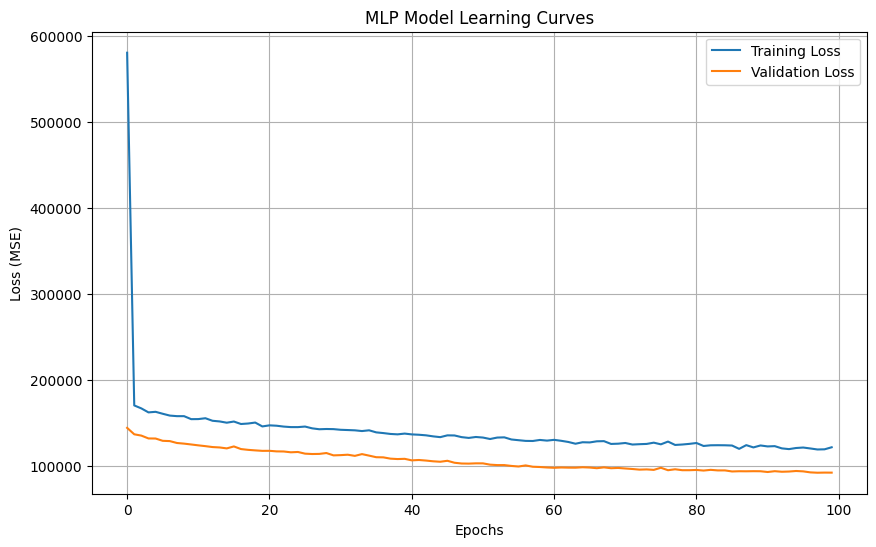

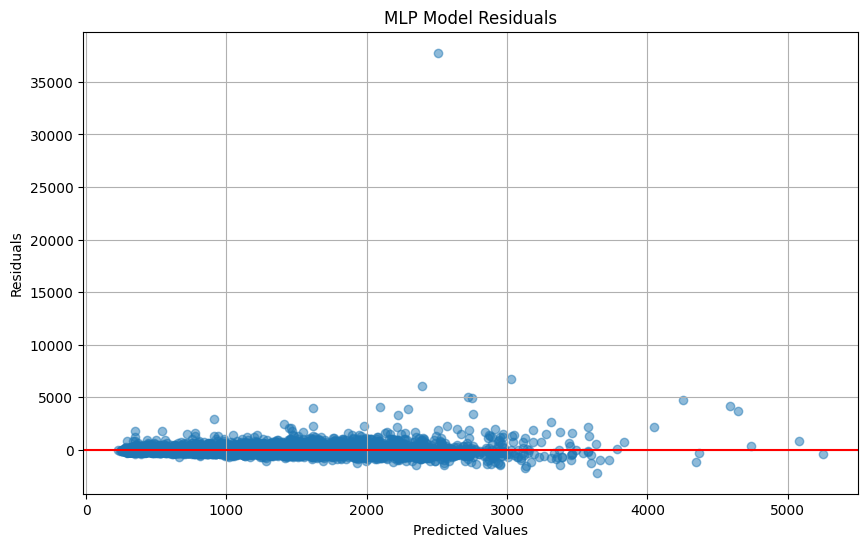

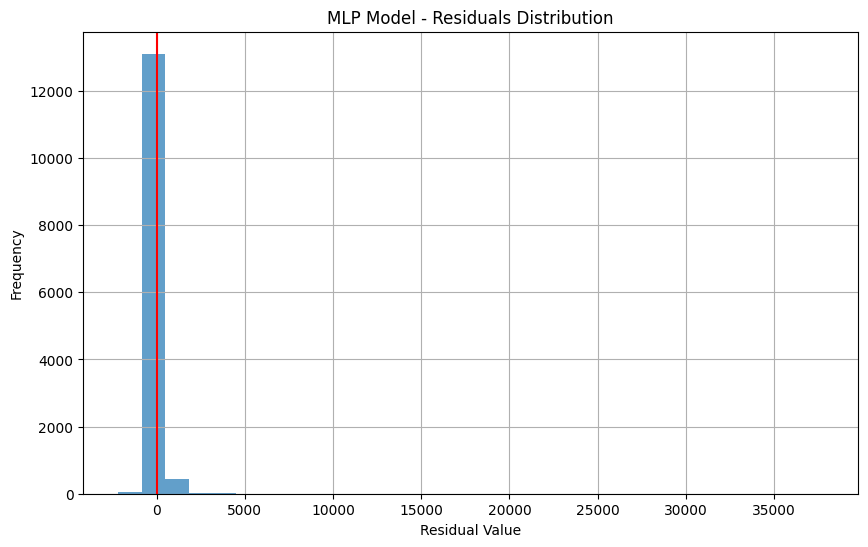

In [53]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Architecture 1: Simple MLP
def create_mlp_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.1),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

# Train and evaluate MLP model
print("\n--- Neural Network: Simple MLP Architecture ---")
mlp_model = create_mlp_model(X_train_std.shape[1])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
mlp_history = mlp_model.fit(
    X_train_std, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Predict and evaluate
y_train_pred_mlp = mlp_model.predict(X_train_std).flatten()
y_test_pred_mlp = mlp_model.predict(X_test_std).flatten()

# Calculate metrics
train_mse_mlp = mean_squared_error(y_train, y_train_pred_mlp)
test_mse_mlp = mean_squared_error(y_test, y_test_pred_mlp)
train_rmse_mlp = np.sqrt(train_mse_mlp)
test_rmse_mlp = np.sqrt(test_mse_mlp)
train_mae_mlp = mean_absolute_error(y_train, y_train_pred_mlp)
test_mae_mlp = mean_absolute_error(y_test, y_test_pred_mlp)
train_r2_mlp = r2_score(y_train, y_train_pred_mlp)
test_r2_mlp = r2_score(y_test, y_test_pred_mlp)

print("\nMLP Neural Network Performance:")
print(f"Train MSE: {train_mse_mlp:.2f}, Test MSE: {test_mse_mlp:.2f}")
print(f"Train RMSE: {train_rmse_mlp:.2f}, Test RMSE: {test_rmse_mlp:.2f}")
print(f"Train MAE: {train_mae_mlp:.2f}, Test MAE: {test_mae_mlp:.2f}")
print(f"Train R²: {train_r2_mlp:.4f}, Test R²: {test_r2_mlp:.4f}")

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(mlp_history.history['loss'], label='Training Loss')
plt.plot(mlp_history.history['val_loss'], label='Validation Loss')
plt.title('MLP Model Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# Plot MLP residuals
plt.figure(figsize=(10, 6))
residuals_mlp = y_test - y_test_pred_mlp
plt.scatter(y_test_pred_mlp, residuals_mlp, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('MLP Model Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Plot residual distribution
plt.figure(figsize=(10, 6))
plt.hist(residuals_mlp, bins=30, alpha=0.7)
plt.axvline(x=0, color='r', linestyle='-')
plt.title('MLP Model - Residuals Distribution')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_17      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_16      │ (None, 20)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_7         │ (None, 1, 10)     │      4,100 │ input_layer_17[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_43 (Dense)    │ (None, 32)        │        672 │ input_layer_16[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_7 (Flatten) │ (None, 10)        │          0 │ embedding_7[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_7       │ (None, 42)        │          0 │ dense_43[0][0],   │
│ (Concatenate)       │                   │            │ flatten_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_44 (Dense)    │ (None, 64)        │      2,752 │ concatenate_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_18          │ (None, 64)        │          0 │ dense_44[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_45 (Dense)    │ (None, 32)        │      2,080 │ dropout_18[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_19          │ (None, 32)        │          0 │ dense_45[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_46 (Dense)    │ (None, 16)        │        528 │ dropout_19[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_47 (Dense)    │ (None, 1)         │         17 │ dense_46[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 10,149 (39.64 KB)

 Trainable params: 10,149 (39.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 540us/step - loss: 1558883.2500 - val_loss: 895582.5000
Epoch 2/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 718937.2500 - val_loss: 477890.7500
Epoch 3/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - loss: 334346.7812 - val_loss: 164583.3281
Epoch 4/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 191637.5469 - val_loss: 114097.9766
Epoch 5/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 135459.6250 - val_loss: 94549.8828
Epoch 6/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - loss: 109574.2656 - val_loss: 87374.8828
Epoch 7/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 108987.0781 - val_loss: 82159.9219
Epoch 8/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - loss: 86810.6953 - val_loss: 78754.1406
Epoch 9/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - loss: 91436.8516 - val_loss: 78721.3906
Epoch 10/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 102076.0703 - val_loss: 74517.4453
Epoch 11/100
795

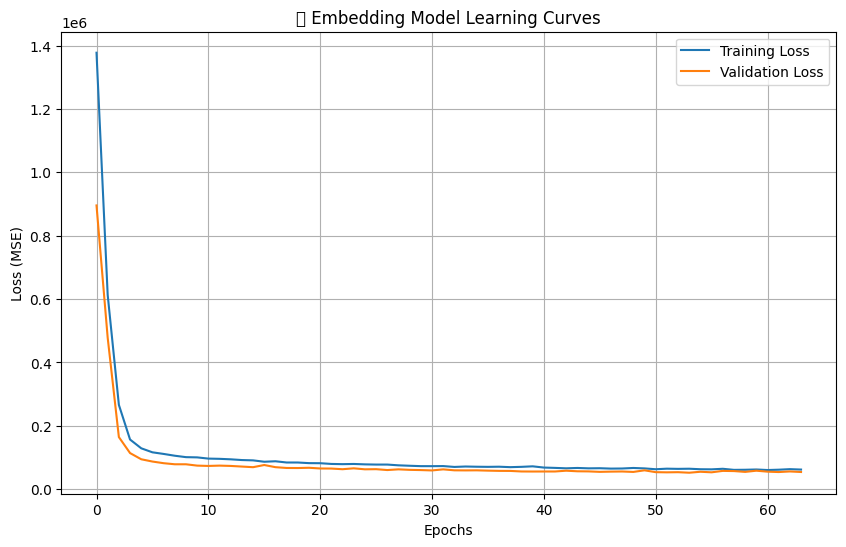

In [56]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten, Concatenate, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# ✅ קביעת מספר בתי המלון על פי הערך המקסימלי בעמודה `hotel_name_encoded`
num_hotels = X_train["hotel_name_encoded"].max() + 1  # לוודא שאין חריגה

# ✅ קלטי ה-ID של המלון
X_train_hotel_id = X_train["hotel_name_encoded"].values
X_test_hotel_id = X_test["hotel_name_encoded"].values

# ✅ הסרת עמודות לא רלוונטיות (ווידוא שהן קיימות לפני המחיקה)
cols_to_drop = {"hotel_name", "hotel_name_encoded"} & set(X_train.columns)
X_train_numeric = X_train.drop(columns=cols_to_drop, errors="ignore").values
X_test_numeric = X_test.drop(columns=cols_to_drop, errors="ignore").values

# ✅ נרמול הנתונים
scaler_emb = StandardScaler()
X_train_numeric_scaled = scaler_emb.fit_transform(X_train_numeric)
X_test_numeric_scaled = scaler_emb.transform(X_test_numeric)

# ✅ בניית המודל עם embedding
def create_embedding_model(numeric_input_dim, num_hotels):
    # 🔢 קלט לפיצ'רים מספריים
    numerical_input = Input(shape=(numeric_input_dim,))
    numeric_dense = Dense(32, activation='relu')(numerical_input)
    
    # 🏨 קלט ל-ID של המלון עם embedding
    hotel_input = Input(shape=(1,))
    hotel_embedding = Embedding(input_dim=num_hotels, output_dim=10, input_length=1)(hotel_input)  
    hotel_flatten = Flatten()(hotel_embedding)
    
    # 🔗 שילוב הנתונים המספריים עם ה-embedding של המלון
    combined = Concatenate()([numeric_dense, hotel_flatten])
    
    # 🔄 שכבות Fully Connected
    x = Dense(64, activation='tanh')(combined)
    x = Dropout(0.2)(x)
    x = Dense(32, activation='sigmoid')(x)
    x = Dropout(0.2)(x)
    x = Dense(16, activation='relu')(x)
    output = Dense(1)(x)
    
    # יצירת המודל
    model = Model(inputs=[numerical_input, hotel_input], outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

# 🔄 **אימון המודל**
embedding_model = create_embedding_model(X_train_numeric_scaled.shape[1], num_hotels)

# 📜 הדפסת מבנה המודל
embedding_model.summary()

# ⏳ הגדרת עצירה מוקדמת
early_stopping_emb = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 🏋️ **אימון המודל**
emb_history = embedding_model.fit(
    [X_train_numeric_scaled, X_train_hotel_id.reshape(-1, 1)], 
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping_emb],
    verbose=1
)

# 🔮 **ניבוי וביצועי המודל**
y_train_pred_emb = embedding_model.predict([X_train_numeric_scaled, X_train_hotel_id.reshape(-1, 1)]).flatten()
y_test_pred_emb = embedding_model.predict([X_test_numeric_scaled, X_test_hotel_id.reshape(-1, 1)]).flatten()

# 🏆 **חישוב מדדים**
train_mse_emb = mean_squared_error(y_train, y_train_pred_emb)
test_mse_emb = mean_squared_error(y_test, y_test_pred_emb)
train_rmse_emb = np.sqrt(train_mse_emb)
test_rmse_emb = np.sqrt(test_mse_emb)
train_mae_emb = mean_absolute_error(y_train, y_train_pred_emb)
test_mae_emb = mean_absolute_error(y_test, y_test_pred_emb)
train_r2_emb = r2_score(y_train, y_train_pred_emb)
test_r2_emb = r2_score(y_test, y_test_pred_emb)

print("\n📊 **ביצועי רשת נוירונים עם Embedding:**")
print(f"Train MSE: {train_mse_emb:.2f}, Test MSE: {test_mse_emb:.2f}")
print(f"Train RMSE: {train_rmse_emb:.2f}, Test RMSE: {test_rmse_emb:.2f}")
print(f"Train MAE: {train_mae_emb:.2f}, Test MAE: {test_mae_emb:.2f}")
print(f"Train R²: {train_r2_emb:.4f}, Test R²: {test_r2_emb:.4f}")

# 📈 **שרטוט עקומת למידה**
plt.figure(figsize=(10, 6))
plt.plot(emb_history.history['loss'], label='Training Loss')
plt.plot(emb_history.history['val_loss'], label='Validation Loss')
plt.title('📊 Embedding Model Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()


TTT-Based Split:
Train set (TTT >= 25): 13300 samples (29.3%)
Test set (TTT < 25): 32100 samples (70.7%)

TTT-based training set size: (13300, 23)
TTT-based test set size: (32100, 23)


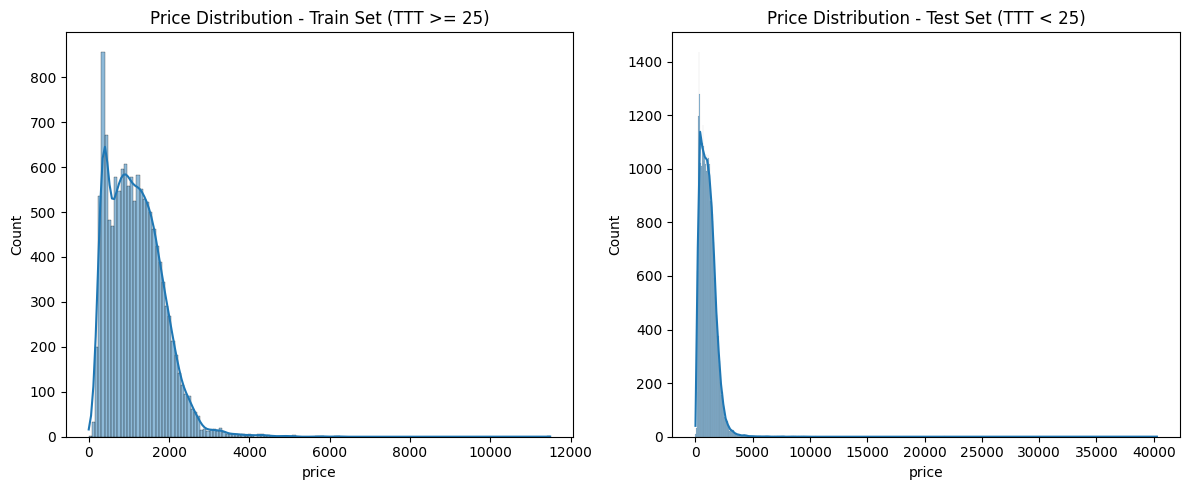


--- Gradient Boosting Regressor with TTT-based split ---


In [ ]:
# Time-Based Train-Test Split for Gradient Boosting
# Train: TTT >= 25 days, Test: TTT < 25 days

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

# Function to evaluate model with TTT-based split
def evaluate_model_ttt_split(model, X_train, X_test, y_train, y_test, model_name="Model"):
    # Train and predict
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Print results
    print(f"\n{model_name} Performance with TTT-based split:")
    print(f"Train set (TTT >= 25) MSE: {train_mse:.2f}, Test set (TTT < 25) MSE: {test_mse:.2f}")
    print(f"Train set (TTT >= 25) RMSE: {train_rmse:.2f}, Test set (TTT < 25) RMSE: {test_rmse:.2f}")
    print(f"Train set (TTT >= 25) MAE: {train_mae:.2f}, Test set (TTT < 25) MAE: {test_mae:.2f}")
    print(f"Train set (TTT >= 25) R²: {train_r2:.4f}, Test set (TTT < 25) R²: {test_r2:.4f}")
    
    # Plot residuals
    plt.figure(figsize=(12, 5))
    
    # Training residuals
    plt.subplot(1, 2, 1)
    residuals_train = y_train - y_train_pred
    plt.scatter(y_train_pred, residuals_train, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{model_name} - Training Residuals (TTT >= 25)')
    
    # Test residuals
    plt.subplot(1, 2, 2)
    residuals_test = y_test - y_test_pred
    plt.scatter(y_test_pred, residuals_test, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{model_name} - Test Residuals (TTT < 25)')
    
    plt.tight_layout()
    plt.show()
    
    # Plot a residual histogram
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.hist(residuals_train, bins=30, alpha=0.7)
    plt.axvline(x=0, color='r', linestyle='-')
    plt.xlabel('Residual Value')
    plt.ylabel('Frequency')
    plt.title(f'{model_name} - Training Residuals Distribution')
    
    plt.subplot(1, 2, 2)
    plt.hist(residuals_test, bins=30, alpha=0.7)
    plt.axvline(x=0, color='r', linestyle='-')
    plt.xlabel('Residual Value')
    plt.ylabel('Frequency')
    plt.title(f'{model_name} - Test Residuals Distribution')
    
    plt.tight_layout()
    plt.show()
    
    # Plot actual vs predicted values
    plt.figure(figsize=(12, 5))
    
    # Training data
    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, alpha=0.5)
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'{model_name} - Training Predictions (TTT >= 25)')
    
    # Test data
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_test_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'{model_name} - Test Predictions (TTT < 25)')
    
    plt.tight_layout()
    plt.show()
    
    # Return metrics
    return {
        'model': model,
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'y_test_pred': y_test_pred
    }

# Create TTT-based split
# Train: TTT >= 25, Test: TTT < 25
mask_train = df['ttt'] >= 25
mask_test = df['ttt'] < 25

# Check the size of each split
train_size = sum(mask_train)
test_size = sum(mask_test)
print(f"TTT-Based Split:")
print(f"Train set (TTT >= 25): {train_size} samples ({100*train_size/len(df):.1f}%)")
print(f"Test set (TTT < 25): {test_size} samples ({100*test_size/len(df):.1f}%)")

# Create feature and target for the new split
X = df.drop(['price', 'snapshot', 'checkin', 'checkout'], axis=1)
y = df['price']

# Convert any remaining object columns to numeric if needed
for col in X.select_dtypes(include=['object']).columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')
    
# Fill any NaN values created by conversion
X = X.fillna(-1)

# Create the split
X_train_ttt = X[mask_train]
X_test_ttt = X[mask_test]
y_train_ttt = y[mask_train]
y_test_ttt = y[mask_test]

print(f"\nTTT-based training set size: {X_train_ttt.shape}")
print(f"TTT-based test set size: {X_test_ttt.shape}")

# Analyze distribution of prices in both sets
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(y_train_ttt, kde=True)
plt.title('Price Distribution - Train Set (TTT >= 25)')
plt.xlabel('price')

plt.subplot(1, 2, 2)
sns.histplot(y_test_ttt, kde=True)
plt.title('Price Distribution - Test Set (TTT < 25)')
plt.xlabel('price')

plt.tight_layout()
plt.show()

# Train Gradient Boosting with TTT-based split
print("\n--- Gradient Boosting Regressor with TTT-based split ---")
gpr_model_ttt = GaussianProcessRegressor(
        kernel=(RBF(length_scale=1.0) * ConstantKernel(1.0) + WhiteKernel(noise_level=0.1)), 
        n_restarts_optimizer=5, 
        normalize_y=True,  
        random_state=42
    )
gb_results_ttt = evaluate_model_ttt_split(gpr_model_ttt, X_train_ttt, X_test_ttt, y_train_ttt, y_test_ttt, 
                                         "GaussianProcessRegressor")

# Print summary of results
print("\n--- Summary: Gradient Boosting with TTT-based Split ---")
print(f"Test R²: {gb_results_ttt['test_r2']:.4f}")
print(f"Test RMSE: {gb_results_ttt['test_rmse']:.2f}")
print(f"Test MAE: {gb_results_ttt['test_mae']:.2f}")